# PISA of compensatory MIRT version with normal theta and Q which evaluated individually

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


## Data preprocessing

In [3]:
raw_df = pd.read_spss("CY07_MSU_STU_COG_testlet.sav")

In [4]:
fil1 = raw_df.iloc[:, 13:65]
print(fil1.shape)
#print(raw_df.iloc[0, 13:65])

(6650, 52)


In [5]:
fil2 = fil1.replace(['Full credit', '1 - Full credit', '2 - Full credit', 'No credit', '0 - No credit'], [1, 1, 1, 0, 0])
#print(fil2)

In [6]:
fil3 = fil2.drop('CM955Q03S', axis=1)
fil4 = fil3.dropna(how='all')
#print(fil4)

In [7]:
stud_AR = fil4.mean(axis=1)
prob_AR = fil4.mean(axis=0)
print("Each student's Answer Rates: ", stud_AR)
print("Answer Rates for each Items: ", prob_AR)

Each student's Answer Rates:  0       0.812500
3       0.687500
5       0.647059
6       0.555556
7       0.733333
          ...   
6642    0.625000
6646    0.333333
6647    0.823529
6648    0.272727
6649    0.470588
Length: 2727, dtype: float64
Answer Rates for each Items:  CM033Q01S    0.817402
CM474Q01S    0.783784
CM155Q01S    0.794776
CM155Q04S    0.565594
CM411Q01S    0.564557
CM411Q02S    0.523632
CM803Q01S    0.340050
CM442Q02S    0.440568
CM034Q01S    0.441250
CM305Q01S    0.427689
CM496Q01S    0.533742
CM496Q02S    0.760652
CM423Q01S    0.818627
CM192Q01S    0.527881
CM603Q01S    0.350311
CM571Q01S    0.530075
CM564Q01S    0.613776
CM564Q02S    0.466830
CM447Q01S    0.853301
CM273Q01S    0.478528
CM408Q01S    0.411980
CM420Q01S    0.278388
CM446Q01S    0.819427
CM559Q01S    0.766871
CM828Q03S    0.161111
CM464Q01S    0.450932
CM800Q01S    0.963370
CM982Q01S    0.798017
CM982Q02S    0.489362
CM982Q03S    0.692308
CM982Q04S    0.562035
CM992Q01S    0.788875
CM992Q02S    0.29343

In [8]:
columcolum = fil4.columns
rowscolumns = fil4.shape
print(columcolum, rowscolumns)

Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object') (2727, 51)


In [9]:
# DataFrame to Numpy
# 'NaN' 자리 찾기 위한 대조군 역할
num_np = fil4.to_numpy()
print(num_np)

# 극과 극은 통하니까 함께 사라져!
scarub_np = np.where(num_np == 1, 0.99, num_np)
scourge_np = np.where(scarub_np == 0, 0.01, scarub_np)
num_df = scourge_np                                     # df가 전혀 아니지만, 일단 족보 꼬이니까 df라고 칩시다.
print(num_df)
num_realdf = pd.DataFrame(num_df)                       # 레알 df임을 강조 (추후 filna(0) 하는데 사용됨)

# Data shape
rows, columns = num_df.shape
print(rows, columns)

# Data show all
#np.set_printoptions(threshold=np.inf, linewidth=np.inf)
#print(num_df)

[[nan nan nan ... nan nan nan]
 [nan nan nan ...  1. nan  1.]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ...  1.  0.  1.]
 [nan nan nan ...  1. nan  0.]
 [ 0.  1.  1. ... nan nan nan]]
[[ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ... 0.99  nan 0.99]
 [ nan  nan  nan ...  nan  nan  nan]
 ...
 [ nan  nan  nan ... 0.99 0.01 0.99]
 [ nan  nan  nan ... 0.99  nan 0.01]
 [0.01 0.99 0.99 ...  nan  nan  nan]]
2727 51


### 1D weight 따원 없다네 (1D weight는 1에서 전혀 벗어나지 않음)

In [10]:
# 개인 정답률 weight default값 도입
w_np = np.ones((columns,1))    # 세로로 길쭉한 모양
w_df = pd.DataFrame(w_np)      # NaN값 처리하는 데는 DataFrame
num_dfdf = pd.DataFrame(num_df)

# 개인 정답률 도출(가로합) -> '초과정답률'로 정정
p_solves = num_dfdf.notnull().sum(1)  # 일단 이건 DataFrame 형태

p_noN = num_dfdf.fillna(0)
p_noN_np = p_noN.to_numpy()
p_reduct = np.dot(p_noN_np, w_np)

p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성

row_prob = p_reduct / p_solT   # 초기조건 (default w로 설정한 값); numpy 형태

print("각 학생 정답률")
print(row_prob)

# 각 문항 당 정답률 도출(세로합)
num_sm = num_dfdf.mean(axis=0)
col_prob_1 = num_sm.to_numpy()
col_prob = np.array([col_prob_1])
print("각 문제 정답률")
print(col_prob)

각 학생 정답률
[[0.80625   ]
 [0.68375   ]
 [0.64411765]
 ...
 [0.81705882]
 [0.27727273]
 [0.47117647]]
각 문제 정답률
[[0.81105392 0.77810811 0.7888806  0.56428218 0.56326582 0.5231592
  0.34324937 0.44175711 0.442425   0.42913473 0.53306748 0.7554386
  0.8122549  0.52732342 0.35330435 0.52947368 0.61150062 0.46749386
  0.84623472 0.47895706 0.41374083 0.28282051 0.81303861 0.76153374
  0.16788889 0.45191304 0.95410256 0.792057   0.48957447 0.68846154
  0.56079404 0.78309735 0.29756757 0.67605528 0.81984334 0.58085
  0.85674907 0.57376989 0.43053165 0.80356098 0.696      0.12755051
  0.45841328 0.80275434 0.84894869 0.304      0.79097686 0.30194406
  0.63641698 0.21303426 0.61801047]]


In [11]:
print(row_prob)

# 개인 능력치 theta 도출
theta = np.log(row_prob/(1-row_prob))                # 초기 theta값: w에서 유래한 theta
print(theta)

[[0.80625   ]
 [0.68375   ]
 [0.64411765]
 ...
 [0.81705882]
 [0.27727273]
 [0.47117647]]
[[ 1.4258252 ]
 [ 0.77105931]
 [ 0.59328118]
 ...
 [ 1.49654643]
 [-0.95803034]
 [-0.11542209]]


In [12]:
# 지수의 상수항 d 도출
d0 = np.log(col_prob/(1-col_prob))
#print(d0)
#print(np.mean(d0))
d = np.mean(d0) - d0
print(d)

[[-1.06592356 -0.86372587 -0.9272418   0.1323897   0.13652236  0.29824616
   1.03979649  0.62498327  0.62227537  0.67633159  0.25848602 -0.73688278
  -1.07377972  0.28154664  0.99549523  0.27291773 -0.06267506  0.52115753
  -1.31442017  0.47517084  0.7394715   1.32146298 -1.07892713 -0.77015735
   1.9916129   0.58389348 -2.64341261 -0.94642005  0.43265748 -0.40198734
   0.14656404 -0.89285904  1.24985721 -0.34475264 -1.12433717  0.06468561
  -1.39759794  0.09370025  0.67063169 -1.01775169 -0.43737265  2.31374167
   0.55768136 -1.01264949 -1.33542983  1.21927127 -0.93987446  1.2290068
  -0.168897    1.69768104 -0.09016289]]


In [13]:
# 문항 변별도 alpha prior: 이 alpha는 두 theta에 모두 적용되는 금형으로 활용
alpha = np.ones((1,columns))
print(alpha)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1.]]


### 2D covariance를 위한 엄선된 자료

In [14]:
# 2D covariance를 위한 자료 -> 지수에만 탑승하는 특수 가공 자료 (mu와 i 차원)

num_exp1 = num_df.copy()

# 맞는 문제는 1, 틀린 문제는 -1, 안 푼 문제는 0으로 정렬
num_exp2 = np.where(num_exp1 == 0.01, -0.99, num_exp1)

num_exp_df = pd.DataFrame(num_exp2)
num_exp_af = num_exp_df.fillna(0)
num_exp_np = num_exp_af.to_numpy()                # NaN만 0으로 치환하고, 다시 numpy 형식으로 환원

#print(num_exp_np)


In [15]:
# 개인 정답률 weight default값 도입 (2D로 시작)
Q_np_ini = np.ones((columns, columns))    # 세로로 길쭉한 모양
np.fill_diagonal(Q_np_ini, 0)
Q_np = Q_np_ini / 2
Q_df = pd.DataFrame(Q_np)      # NaN값 처리하는 데는 DataFrame
print(Q_np.shape)
print(Q_np)


# 개인 covariance 도출(3D Tensor 형태)
shell_list = []

for i in range(rows):
    garo_pre = num_exp_np[i, :]
    garo = np.reshape(garo_pre, (1, columns))
    sero = np.copy(garo)
    sero_T = np.transpose(sero)
    carrier = garo * sero_T /2
    np.fill_diagonal(carrier, 0)
    
    shell_list.append(carrier)

shell = np.array(shell_list)          # 얘가 대조군
print(shell[2, 11, 13])
print(shell[2, 11, 11])
print(shell[2, 9:15, 9:15])
print(shell.shape)
print(shell[2, :, :].shape)

(51, 51)
[[0.  0.5 0.5 ... 0.5 0.5 0.5]
 [0.5 0.  0.5 ... 0.5 0.5 0.5]
 [0.5 0.5 0.  ... 0.5 0.5 0.5]
 ...
 [0.5 0.5 0.5 ... 0.  0.5 0.5]
 [0.5 0.5 0.5 ... 0.5 0.  0.5]
 [0.5 0.5 0.5 ... 0.5 0.5 0. ]]
0.49005
0.0
[[ 0.      -0.49005 -0.49005 -0.49005 -0.49005  0.49005]
 [-0.49005  0.       0.49005  0.49005  0.49005 -0.49005]
 [-0.49005  0.49005  0.       0.49005  0.49005 -0.49005]
 [-0.49005  0.49005  0.49005  0.       0.49005 -0.49005]
 [-0.49005  0.49005  0.49005  0.49005  0.      -0.49005]
 [ 0.49005 -0.49005 -0.49005 -0.49005 -0.49005  0.     ]]
(2727, 51, 51)
(51, 51)


In [16]:
# 기본적인 theta 값 도출 / 일단 P 도출 먼저

#재료 만들기
p_sol = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
p_solT = np.reshape(p_sol, (rows,1))  # 세로로 길쭉한 모양으로 형성
denominator = p_solT * (p_solT - 1)
P_carrier = []
theta_ini = []

# P 뽑아내기
for i in range(rows):
    garo_pre = num_exp_np[i, :]
    garo = np.reshape(garo_pre, (1, columns))
    sero = np.copy(garo)
    sero_T = np.transpose(sero)
    
    vectorman1 = np.dot(Q_np, sero_T)
    vectorman2 = np.dot(garo, vectorman1)
    
    if denominator[i, 0] == 0:
        P_mu = 0
    else:
        P_mu = vectorman2[0,0] / denominator[i, 0]
    
    P_carrier.append(P_mu)
    
P_norm = np.array(P_carrier)

print("각 학생의 문제당 covariance")
print(P_norm)

theta_pre = 0.98 * (P_norm + 0.5) + 0.01
print(theta_pre)

# theta로 변환
theta1_bfT = np.log(theta_pre / (1 - theta_pre))
theta1 = np.reshape(theta1_bfT, (rows,1))
print("각 학생의 ability theta")
print(theta1)


각 학생의 문제당 covariance
[ 0.1715175   0.0408375   0.01441324 ...  0.18737206  0.06237
 -0.02882647]
[0.66808715 0.54002075 0.51412497 ... 0.68362462 0.5611226  0.47175006]
각 학생의 ability theta
[[ 0.69954619]
 [ 0.16042618]
 [ 0.05651492]
 ...
 [ 0.77047953]
 [ 0.24571932]
 [-0.11312024]]


### Compensatory MIRT model initialization

In [17]:
# 각 성분별 P값 도출 (실험군)
exp1 = alpha * theta
exp2 = alpha * theta1

ex_prob = np.exp(exp1 + exp2 - d)/(1+np.exp(exp1 + exp2 - d))
print(ex_prob)

[[0.96050537 0.95207914 0.95489521 ... 0.90840124 0.60532201 0.90163585]
 [0.88052478 0.85756502 0.86514854 ... 0.75033177 0.31730266 0.73529356]
 [0.84757668 0.81958258 0.8287846  ... 0.69395885 0.25963146 0.67698689]
 ...
 [0.96554204 0.95814356 0.96061799 ... 0.91952591 0.63861201 0.91350394]
 [0.58749333 0.53778156 0.5535268  ... 0.36739375 0.08241392 0.34929305]
 [0.69791339 0.65366389 0.66789937 ... 0.48509309 0.12716919 0.46546024]]


In [34]:
# Learning Rate 설정
A = 0.0025

In [19]:
# 결측치 반영한 P 행렬 도출 (실험군)
ex_prob_real = ex_prob.copy()

for n in range(ex_prob.shape[0]):
    for m in range(ex_prob.shape[1]):
        if np.isnan(num_df[n][m]):
            ex_prob_real[n][m] = np.nan
            
print(ex_prob_real)


[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.75033177        nan 0.73529356]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.91952591 0.63861201 0.91350394]
 [       nan        nan        nan ... 0.36739375        nan 0.34929305]
 [0.69791339 0.65366389 0.66789937 ...        nan        nan        nan]]


In [20]:
ex_prob_pd = pd.DataFrame(ex_prob_real)
print(ex_prob_pd)

            0         1         2         3         4         5         6   \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...        ...       ...       ...       ...       ...       ...       ...   
2722       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2723  0.622661  0.574115  0.589567  0.332377  0.331461  0.296648  0.167303   
2724       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2725       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2726  0.697913  0.653664  0.667899  0.410734  0.409734  0.371266  0.219542   

            7         8         9   ...        41        42    

In [21]:
# Kullbeck Leibler Divergence값 도출

# 각 사람이 각 문제에 대한 KLD 도출
KLD_indiv = num_df * np.log(num_df / ex_prob_real) + (1 - num_df) * np.log((1 - num_df) / (1 - ex_prob_real))
print(KLD_indiv)

# NaN 쌈싸먹기 위한 dataframe 변환 후 제자리
KLD_indiv_df = pd.DataFrame(KLD_indiv)
KLD_NaNga_df = KLD_indiv_df.fillna(0)
KLD_NaNga_np = KLD_NaNga_df.to_numpy()
print(KLD_NaNga_np)

# KLD 최초도출
KLD_RowSum = np.sum(KLD_NaNga_np, axis=1)
KLD_TotalSum_np = np.sum(KLD_RowSum, axis=0)
print(KLD_TotalSum_np)

[[       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ... 0.2422421         nan 0.2617004 ]
 [       nan        nan        nan ...        nan        nan        nan]
 ...
 [       nan        nan        nan ... 0.05225475 0.95610814 0.05803794]
 [       nan        nan        nan ... 0.93988544        nan 0.37991584]
 [1.13266616 0.3755123  0.35460323 ...        nan        nan        nan]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.2422421  0.         0.2617004 ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.05225475 0.95610814 0.05803794]
 [0.         0.         0.         ... 0.93988544 0.         0.37991584]
 [1.13266616 0.3755123  0.35460323 ... 0.         0.         0.        ]]
17556.45849248126


## Real NDG Process

In [22]:
# 인당 풀이 문제 수 나타내는 함수
def p_sol():
    
    p_solves = fil4.notnull().sum(1)
    p_sol = p_solves.to_numpy()
    p_solT = np.reshape(p_sol, (rows, 1))
    
    return p_solT

In [23]:
# '필수요소' 점검 탭
# 학생 covariance률 구하는 함수
def answer_covari(Q_let):                # w_let은 np 형식

    #재료 만들기
    p_sol_let = p_solves.to_numpy()    # N_mu에 해당하는 numpy 벡터
    p_sol_letT = np.reshape(p_sol_let, (rows,1))  # 세로로 길쭉한 모양으로 형성
    denomin = p_sol_letT * (p_sol_letT - 1)
    P_carrier = []

    # P 뽑아내기
    for i in range(rows):
        P_mu = 0
        garo_pre = num_exp_np[i, :]
        garo = np.reshape(garo_pre, (1, columns))
        sero = np.copy(garo)
        sero_T = np.transpose(sero)
    
        vectorman1 = np.dot(Q_np, sero_T)
        vectorman2 = np.dot(garo, vectorman1)
        
        if denomin[i, 0] == 0:
            P_mu = 0.
        else:
            P_mu = vectorman2[0,0] / denomin[i, 0]
    
        P_carrier.append(P_mu)
    
    P_norm_bfT = np.array(P_carrier)
    P_norm = np.reshape(P_norm_bfT, (rows, 1))

    # theta 만들 수 있도록 normalization

    rate_result = 0.98 * (P_norm + 0.5) + 0.01
    
    return rate_result

In [24]:
# 각 학생의 각 문제 정답 기댓값 (모델로 계산)
# 비교대상은 num_df
# 모든 변수 초기값의 형태는 np
def expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le):
#    theta_T = np.transpose(theta_let)              # theta를 세로로 세우기
    
    exponet_neg1 = (-1) * alpha_let * theta_let
    exponet_neg2 = (-1) * alpha2le * theta2le
    
    before_nan = 1/ (1 + np.exp(exponet_neg1 + exponet_neg2 + d_let))
    after_nan = before_nan.copy()
    
    # 순진한 모델값에 구멍 뚫어버리기
    for n in range(before_nan.shape[0]):
        for m in range(before_nan.shape[1]):
            if np.isnan(num_df[n][m]):
                after_nan[n][m] = np.nan
    
    # 너덜해진 모델값의 모난 부분 절단
    scarub = np.where(after_nan > 0.99, 0.99, after_nan)
    scourge = np.where(scarub < 0.01, 0.01, scarub)
    model_result = scourge
    
    return model_result                              # numpy 형태로 return


In [25]:
# D_KL 미분계수 계산 시 공통부분을 계산하는 함수

def preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    p_imu = expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le)    # 그냥 p_imu 일일이 계산하기 귀찮아서... 일단 2D로 추출
    q_imu = num_df.copy()                                                    # 얘는 그냥 대조군

    # 바로 p와 q 조합
    KLD_common = p_imu - q_imu           # 항상 우려먹을 공통부분: '사람 X 문항' 형태
    
    return KLD_common                   # 형태는 numpy array 2D -> num_df와 같은 형태

In [26]:
# alpha값 갱신하는 함수
# theta_let, beta_let, alpha_let은 np
def set_alpha(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # 밑재료 만들기
    exponet_neg1 = (-1) * alpha_let * theta_let
    exponet_neg2 = (-1) * alpha2le * theta2le
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = theta_let * common_unit                               # 인원 summation 하기 전 (np)
    
    dmatrix_df = pd.DataFrame(delta_matrix)                              # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                   # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_alphak = delta_matrix2.sum(axis=0, keepdims = True)            # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    alpha_med = alpha_let - A * delta_alphak                             # Gradient Descent 방식으로 D_KL의 alpha 업데이트
    alpha_result = alpha_med
    
    # 결과값은 np 형태로 추출
    return alpha_result

In [27]:
# 의문의 delta값 갱신하는 함수
# theta_let, delta_let, alpha_let은 np
def set_delta(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # 밑재료 만들기
    exponet_neg1 = (-1) * alpha_let * theta_let
    exponet_neg2 = (-1) * alpha2le * theta2le
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)       # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = (-1) * common_unit                                                # 인원 summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_dtak = delta_matrix2.sum(axis=0, keepdims = True)                         # 인원 summation 직후 (문제당 alpha 맞추기 위한 summation)
    
    d_med = d_let - A * delta_dtak                                            # Gradient Descent 방식으로 D_KL의 delta 업데이트
    d_result = d_med - np.mean(d_med)
    
    # 결과값은 np 형태로 추출
    return d_result

In [28]:
def update_theta(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # 밑재료 만들기
    common_unit = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)
    
    # 요리 시작
    delta_matrix = alpha_let * common_unit                                           # summation 하기 전
    
    dmatrix_df = pd.DataFrame(delta_matrix)                                          # fillna 처리하기 위한 DataFrame 임시도입
    dmatrix_fna = dmatrix_df.fillna(0)                                               # NaN 무시하고 smooth하게 계산하기 위한 기반 다지기
    delta_matrix2 = dmatrix_fna.to_numpy()
    
    delta_thetak = delta_matrix2.sum(axis=1, keepdims = True)   # summation 직후 (문제당 beta 맞추기 위한 summation)
        
    theta_update = theta_let - A * delta_thetak                 # Gradient Descent 방식으로 D_KL 업데이트
    
    # 결과값은 np 형태로 추출
    return theta_update

In [29]:
# Q값 갱신하는 함수
# theta_let, beta_let, alpha_let, w_let은 np
def set_Q(Q_let, alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    # theta 건들기 전에 할 수 있는 미분 chain
    M = shell.copy()                                 # Yi, Yj 곱한 자료 바로 발췌, 3D Tensor
    p_s1 = fil4.notnull().sum(1)
    p_s2 = p_s1.to_numpy()
    p_solT = np.reshape(p_s2, (rows, 1))
    denomi = p_solT * (p_solT - 1)                   # '사람 X 문항' matrix

    Q_np_test = Q_let.copy()

    P_indiv_deriv_list = []
    P_indiv = answer_covari(Q_np_test)
    
    for i in range(rows):
        if denomi[i, 0] == 0:
            banban = 0 * M[i, :, :]
            P_mu = banban
        else:
            carrier2 = M[i, :, :] / (P_indiv[i, 0] * (1 - P_indiv[i, 0]))
            banban = carrier2 / denomi[i, 0]
            P_mu = banban
    
        P_indiv_deriv_list.append(P_mu)

    theta_indiv_deriv = np.array(P_indiv_deriv_list)                   # 3D array 생성 -> csv로 저장 불가능

#---------------------------------------------------3D up ------------- 2D down ----------------------------------------------------------
    
    # '공통부분' 끌올 (밑재료 준비)
    common_unit_pt = preprocess_diff(alpha_let, alpha2le, d_let, theta_let, theta2le)   # 결측치 부분이 이미 0으로 처리된 상태로 추출 (numpy 형태)

    # '공통부분' 끌올 (요리 시작)
    common_unit_np = alpha_let * common_unit_pt
        
    common_unit_T = np.transpose(common_unit_np)                      # '문항 X 사람' 형태로 변환
    decoy_1st = pd.DataFrame(common_unit_T)
    decoy_2nd = decoy_1st.fillna(0)
    common_unit = decoy_2nd.to_numpy()                                 # 4D List로 변환 준비 끝

#-----------------------------------Now, it's time to build a 4D tensor ------------------------------------------------------------------
    
    P_hat_list = []                                                    # 4D Tensor 담을 list 생성 (4D Tensor라니... 미친듯이 무섭군요..!!)
    P_hat_3D = []                                                      # 3D Tensor 일부분을 담을 list 생성
    carrier_2D = []

    for i in range(columns):
        for j in range(columns):
            for mu in range(rows):
                carrier = common_unit[:, mu] * theta_indiv_deriv[mu, i, j]
                carrier_2D.append(carrier)
            P_hat_3D.append(carrier_2D)          # 4D Tensor로 재조합하기 위해 P_hat_list를 채운 모습 i, jth 성부 채우기
            carrier_2D = []                      # carrier_2D를 재활용 하기 위해 내용물을 비운 모습
        P_hat_list.append(P_hat_3D)              # 드디어 ith 완성
        P_hat_3D = []                            # P_hat_3D를 재활용 하기 위해 내용물을 비운 모습
        
    P_hat_np = np.array(P_hat_list)                                      # 4D Tensor로 완성된 모습 (여기서 i, j는 냅두고, k와 mu를 모두 더해서 없애야 함) (이때 0은 k, 1은 mu, 2, 3은 각각 i, j)

    # KLD Gradient Discent
    Q_pre = P_hat_np.sum(axis=3)                                 # 4D Tensor는 극혐이므로, 여기선 keepdims를 하지 않는다. (4D -> 3D); 여기는 mu 없애는 부분
    Q_presum = Q_pre.sum(axis=2)                              # 3D Tensor 역시 극혐이므로, keepdims를 하지 않는다. (3D -> 2D); 여기는 k 없애는 부분
    
    # Final Gradient Descendent: update
    Q_med = Q_np_test - A * Q_presum
    np.fill_diagonal(Q_med, 0)
    Q_result = Q_med/(2 * Q_med.mean())                                  # Normalization 대용; 대각선 아닌 모든 성분의 평균이 0.5가 되도록 세팅

    # 결과값은 np 형태로 추출
    return Q_result                                                     # 2D matrix로 return

In [30]:
# theta값 갱신하는 함수
# update된 w 사용해서 직접 theta를 update 시킴. Gradient Discent 사용 안 함
# w_let은 np
def set_theta_Q(Q_let):
    
    P_mu_sum = answer_covari(Q_let)                         # 세로 형태로 도출
    theta_result = np.log((P_mu_sum)/(1 - P_mu_sum))
    
    # 결과값은 np 형태로 추출
    return theta_result

In [31]:
# D_KL값 도출하는 함수
# alpha_let, beta_let, theta_let, num_df_let 모두 np
def set_D_KL(alpha_let, alpha2le, d_let, theta_let, theta2le):
    
    P_imu = expect_model(alpha_let, alpha2le, d_let, theta_let, theta2le)
    Q_imu = num_df.copy()
    
    KLD_imu_np = Q_imu * np.log((Q_imu) / (P_imu)) + (1 - Q_imu) * np.log((1 - Q_imu)/(1 - P_imu))
    
    # 잠깐 df로 바꿔치기 (fillna 원툴)
    KLD_imu_df = pd.DataFrame(KLD_imu_np)
    KLD_shuttle = KLD_imu_df.fillna(0)
    KLD_imu = KLD_shuttle.to_numpy()
    
    D_KL_mu = KLD_imu.sum(axis=1)
    D_KL = D_KL_mu.sum(axis=0)
    
    return D_KL

In [35]:
alpha1_test = alpha.copy()
alpha2_test = alpha.copy()
d_test = d.copy()
#w_test = w_np.copy()
Q_test = Q_np.copy()
theta1_test = theta.copy()
theta2_test = theta1.copy()
KLD_test = KLD_TotalSum_np.copy()

In [36]:
# 본격 Iteration 굴리는 파트
limit = 5000
for k in range(limit):
    # alpha1값 갱신
    alpha1_carrier = set_alpha(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    alpha1_test = alpha1_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # alpha2값 갱신
    alpha2_carrier = set_alpha(alpha2_test, alpha1_test, d_test, theta2_test, theta1_test)
    alpha2_test = alpha2_carrier
    #print("%d 번째 Alpha 값 = " % (k+1), alpha_test)

    # d값 갱신
    delta_carrier = set_delta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    d_test = delta_carrier
    #print("%d 번째 Beta 값 = " % (k+1), beta_test)

    # w값 갱신
#    w_carrier = set_w(w_test, alpha1_test, beta1_test, theta1_test, alpha2_test, beta2_test, theta2_test)
#    w_test = w_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # Q값 갱신
    Q_carrier = set_Q(Q_test, alpha2_test, alpha1_test, d_test, theta2_test, theta1_test)
    Q_test = Q_carrier
    #print("%d 번째 w 벡터 값 = " % (k+1), w_test)
    
    # 노멀 theta값 갱신
    theta1_carrier = update_theta(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    theta1_test = theta1_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)
    
    # 복잡한 theta2값 갱신
    theta2_carrier = set_theta_Q(Q_test)
    theta2_test = theta2_carrier
    #print("%d 번째 Theta 값 = " % (k+1), theta_test)

    # Kullback-Leibler Divergence값 도출
    KLD_carrier = set_D_KL(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
    print("%d 번째 Kullback-Leibler Divergence 값 = " % (k+1), KLD_carrier)
    
    # 작업을 멈출지 말지 결정
    if (k < limit - 1) and (KLD_carrier < KLD_test):
        KLD_test = KLD_carrier
    elif k == limit - 1:
        KLD_test = KLD_carrier
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)

    else:
        print("최종 ICC 변수 일람")
        print("최종 Kullback-Leibler Divergence 값 = ", KLD_test)
        print("최종 Alpha1 값 = ", alpha1_test)
        print("최종 d 값 = ", d_test)
        #print("최종 w 벡터 값 = ", w_test)
        print("최종 Theta1 값 = ", theta1_test)
        print("최종 Alpha2 값 = ", alpha2_test)
        print("최종 Q 행렬 값 = ", Q_test)
        print("최종 Theta2 값 = ", theta2_test)
        break

1 번째 Kullback-Leibler Divergence 값 =  17153.52048237237
2 번째 Kullback-Leibler Divergence 값 =  16960.540154761344
3 번째 Kullback-Leibler Divergence 값 =  16844.287316828766
4 번째 Kullback-Leibler Divergence 값 =  16764.731506420652
5 번째 Kullback-Leibler Divergence 값 =  16705.37968425764
6 번째 Kullback-Leibler Divergence 값 =  16658.62057946701
7 번째 Kullback-Leibler Divergence 값 =  16620.494021086
8 번째 Kullback-Leibler Divergence 값 =  16588.5111402459
9 번째 Kullback-Leibler Divergence 값 =  16561.155374446495
10 번째 Kullback-Leibler Divergence 값 =  16537.337254826547
11 번째 Kullback-Leibler Divergence 값 =  16516.403836140926
12 번째 Kullback-Leibler Divergence 값 =  16497.78501447728
13 번째 Kullback-Leibler Divergence 값 =  16481.055511091705
14 번째 Kullback-Leibler Divergence 값 =  16465.915040441127
15 번째 Kullback-Leibler Divergence 값 =  16452.113571417896
16 번째 Kullback-Leibler Divergence 값 =  16439.44762939951
17 번째 Kullback-Leibler Divergence 값 =  16427.761438561203
18 번째 Kullback-Leibler Divergence

143 번째 Kullback-Leibler Divergence 값 =  16074.445268929827
144 번째 Kullback-Leibler Divergence 값 =  16073.203241332467
145 번째 Kullback-Leibler Divergence 값 =  16071.968216569003
146 번째 Kullback-Leibler Divergence 값 =  16070.740108399958
147 번째 Kullback-Leibler Divergence 값 =  16069.518830837493
148 번째 Kullback-Leibler Divergence 값 =  16068.304297089397
149 번째 Kullback-Leibler Divergence 값 =  16067.096420308346
150 번째 Kullback-Leibler Divergence 값 =  16065.895112512566
151 번째 Kullback-Leibler Divergence 값 =  16064.70028570756
152 번째 Kullback-Leibler Divergence 값 =  16063.51186465365
153 번째 Kullback-Leibler Divergence 값 =  16062.329775634791
154 번째 Kullback-Leibler Divergence 값 =  16061.153942567948
155 번째 Kullback-Leibler Divergence 값 =  16059.98428040629
156 번째 Kullback-Leibler Divergence 값 =  16058.82070590346
157 번째 Kullback-Leibler Divergence 값 =  16057.663139013444
158 번째 Kullback-Leibler Divergence 값 =  16056.511508794189
159 번째 Kullback-Leibler Divergence 값 =  16055.365194434871
1

283 번째 Kullback-Leibler Divergence 값 =  15943.042994380181
284 번째 Kullback-Leibler Divergence 값 =  15942.307464843225
285 번째 Kullback-Leibler Divergence 값 =  15941.574019730635
286 번째 Kullback-Leibler Divergence 값 =  15940.842650464889
287 번째 Kullback-Leibler Divergence 값 =  15940.11335030017
288 번째 Kullback-Leibler Divergence 값 =  15939.386113554438
289 번째 Kullback-Leibler Divergence 값 =  15938.660933230103
290 번째 Kullback-Leibler Divergence 값 =  15937.937802701152
291 번째 Kullback-Leibler Divergence 값 =  15937.216713954756
292 번째 Kullback-Leibler Divergence 값 =  15936.497658910383
293 번째 Kullback-Leibler Divergence 값 =  15935.780630128713
294 번째 Kullback-Leibler Divergence 값 =  15935.065619511297
295 번째 Kullback-Leibler Divergence 값 =  15934.352619745605
296 번째 Kullback-Leibler Divergence 값 =  15933.641625573335
297 번째 Kullback-Leibler Divergence 값 =  15932.932633002925
298 번째 Kullback-Leibler Divergence 값 =  15932.225635674931
299 번째 Kullback-Leibler Divergence 값 =  15931.52062324470

423 번째 Kullback-Leibler Divergence 값 =  15857.607092795613
424 번째 Kullback-Leibler Divergence 값 =  15857.100593839386
425 번째 Kullback-Leibler Divergence 값 =  15856.595398126228
426 번째 Kullback-Leibler Divergence 값 =  15856.091504694927
427 번째 Kullback-Leibler Divergence 값 =  15855.588909490449
428 번째 Kullback-Leibler Divergence 값 =  15855.087602533793
429 번째 Kullback-Leibler Divergence 값 =  15854.587581409107
430 번째 Kullback-Leibler Divergence 값 =  15854.088842681049
431 번째 Kullback-Leibler Divergence 값 =  15853.591381422939
432 번째 Kullback-Leibler Divergence 값 =  15853.095194087797
433 번째 Kullback-Leibler Divergence 값 =  15852.600278309437
434 번째 Kullback-Leibler Divergence 값 =  15852.106630593018
435 번째 Kullback-Leibler Divergence 값 =  15851.614243468859
436 번째 Kullback-Leibler Divergence 값 =  15851.123111873916
437 번째 Kullback-Leibler Divergence 값 =  15850.63323386453
438 번째 Kullback-Leibler Divergence 값 =  15850.144607661481
439 번째 Kullback-Leibler Divergence 값 =  15849.65723102322

563 번째 Kullback-Leibler Divergence 값 =  15797.49044098426
564 번째 Kullback-Leibler Divergence 값 =  15797.123434484547
565 번째 Kullback-Leibler Divergence 값 =  15796.757220551255
566 번째 Kullback-Leibler Divergence 값 =  15796.391794824913
567 번째 Kullback-Leibler Divergence 값 =  15796.027154007676
568 번째 Kullback-Leibler Divergence 값 =  15795.663294835882
569 번째 Kullback-Leibler Divergence 값 =  15795.300214361701
570 번째 Kullback-Leibler Divergence 값 =  15794.937909400012
571 번째 Kullback-Leibler Divergence 값 =  15794.576377349207
572 번째 Kullback-Leibler Divergence 값 =  15794.215614843892
573 번째 Kullback-Leibler Divergence 값 =  15793.855618782472
574 번째 Kullback-Leibler Divergence 값 =  15793.496385846563
575 번째 Kullback-Leibler Divergence 값 =  15793.137913122186
576 번째 Kullback-Leibler Divergence 값 =  15792.78019774467
577 번째 Kullback-Leibler Divergence 값 =  15792.423236812809
578 번째 Kullback-Leibler Divergence 값 =  15792.067028568388
579 번째 Kullback-Leibler Divergence 값 =  15791.71157076419


703 번째 Kullback-Leibler Divergence 값 =  15752.642843584861
704 번째 Kullback-Leibler Divergence 값 =  15752.362485401254
705 번째 Kullback-Leibler Divergence 값 =  15752.082604590494
706 번째 Kullback-Leibler Divergence 값 =  15751.803197818366
707 번째 Kullback-Leibler Divergence 값 =  15751.524261517541
708 번째 Kullback-Leibler Divergence 값 =  15751.245793987442
709 번째 Kullback-Leibler Divergence 값 =  15750.967793619962
710 번째 Kullback-Leibler Divergence 값 =  15750.690258909763
711 번째 Kullback-Leibler Divergence 값 =  15750.413187590848
712 번째 Kullback-Leibler Divergence 값 =  15750.136578290332
713 번째 Kullback-Leibler Divergence 값 =  15749.860429542696
714 번째 Kullback-Leibler Divergence 값 =  15749.584739423897
715 번째 Kullback-Leibler Divergence 값 =  15749.309506455551
716 번째 Kullback-Leibler Divergence 값 =  15749.034729594652
717 번째 Kullback-Leibler Divergence 값 =  15748.760407676868
718 번째 Kullback-Leibler Divergence 값 =  15748.486539096324
719 번째 Kullback-Leibler Divergence 값 =  15748.2131221198

843 번째 Kullback-Leibler Divergence 값 =  15717.004470277323
844 번째 Kullback-Leibler Divergence 값 =  15716.764609056598
845 번째 Kullback-Leibler Divergence 값 =  15716.525063509856
846 번째 Kullback-Leibler Divergence 값 =  15716.285833663791
847 번째 Kullback-Leibler Divergence 값 =  15716.046919631364
848 번째 Kullback-Leibler Divergence 값 =  15715.808321236043
849 번째 Kullback-Leibler Divergence 값 =  15715.570038283564
850 번째 Kullback-Leibler Divergence 값 =  15715.332070794133
851 번째 Kullback-Leibler Divergence 값 =  15715.094418769979
852 번째 Kullback-Leibler Divergence 값 =  15714.857082139592
853 번째 Kullback-Leibler Divergence 값 =  15714.620060878511
854 번째 Kullback-Leibler Divergence 값 =  15714.383354623582
855 번째 Kullback-Leibler Divergence 값 =  15714.146963149245
856 번째 Kullback-Leibler Divergence 값 =  15713.910886486325
857 번째 Kullback-Leibler Divergence 값 =  15713.67512468198
858 번째 Kullback-Leibler Divergence 값 =  15713.43967784134
859 번째 Kullback-Leibler Divergence 값 =  15713.204546250097

983 번째 Kullback-Leibler Divergence 값 =  15686.279144623242
984 번째 Kullback-Leibler Divergence 값 =  15686.068103984222
985 번째 Kullback-Leibler Divergence 값 =  15685.857349421345
986 번째 Kullback-Leibler Divergence 값 =  15685.646880723063
987 번째 Kullback-Leibler Divergence 값 =  15685.43669741762
988 번째 Kullback-Leibler Divergence 값 =  15685.226799478085
989 번째 Kullback-Leibler Divergence 값 =  15685.017186884086
990 번째 Kullback-Leibler Divergence 값 =  15684.807859672077
991 번째 Kullback-Leibler Divergence 값 =  15684.598817911743
992 번째 Kullback-Leibler Divergence 값 =  15684.390061591781
993 번째 Kullback-Leibler Divergence 값 =  15684.181590547942
994 번째 Kullback-Leibler Divergence 값 =  15683.973404696517
995 번째 Kullback-Leibler Divergence 값 =  15683.765504045754
996 번째 Kullback-Leibler Divergence 값 =  15683.557888540068
997 번째 Kullback-Leibler Divergence 값 =  15683.350557947244
998 번째 Kullback-Leibler Divergence 값 =  15683.143512208582
999 번째 Kullback-Leibler Divergence 값 =  15682.93675105510

1121 번째 Kullback-Leibler Divergence 값 =  15659.779451657914
1122 번째 Kullback-Leibler Divergence 값 =  15659.6057042619
1123 번째 Kullback-Leibler Divergence 값 =  15659.432200968206
1124 번째 Kullback-Leibler Divergence 값 =  15659.258941367312
1125 번째 Kullback-Leibler Divergence 값 =  15659.085924905623
1126 번째 Kullback-Leibler Divergence 값 =  15658.913150971644
1127 번째 Kullback-Leibler Divergence 값 =  15658.740619087235
1128 번째 Kullback-Leibler Divergence 값 =  15658.568328737452
1129 번째 Kullback-Leibler Divergence 값 =  15658.396279500465
1130 번째 Kullback-Leibler Divergence 값 =  15658.22447109507
1131 번째 Kullback-Leibler Divergence 값 =  15658.05290314542
1132 번째 Kullback-Leibler Divergence 값 =  15657.881575295107
1133 번째 Kullback-Leibler Divergence 값 =  15657.710487009968
1134 번째 Kullback-Leibler Divergence 값 =  15657.539637644746
1135 번째 Kullback-Leibler Divergence 값 =  15657.369026602857
1136 번째 Kullback-Leibler Divergence 값 =  15657.198653312822
1137 번째 Kullback-Leibler Divergence 값 =  156

1259 번째 Kullback-Leibler Divergence 값 =  15637.907743862625
1260 번째 Kullback-Leibler Divergence 값 =  15637.763260868469
1261 번째 Kullback-Leibler Divergence 값 =  15637.618958839143
1262 번째 Kullback-Leibler Divergence 값 =  15637.474837363283
1263 번째 Kullback-Leibler Divergence 값 =  15637.330896035228
1264 번째 Kullback-Leibler Divergence 값 =  15637.18713445888
1265 번째 Kullback-Leibler Divergence 값 =  15637.0435522328
1266 번째 Kullback-Leibler Divergence 값 =  15636.900148963256
1267 번째 Kullback-Leibler Divergence 값 =  15636.756924259982
1268 번째 Kullback-Leibler Divergence 값 =  15636.613877728756
1269 번째 Kullback-Leibler Divergence 값 =  15636.471008975626
1270 번째 Kullback-Leibler Divergence 값 =  15636.328317534404
1271 번째 Kullback-Leibler Divergence 값 =  15636.18580292517
1272 번째 Kullback-Leibler Divergence 값 =  15636.043464749404
1273 번째 Kullback-Leibler Divergence 값 =  15635.90130264777
1274 번째 Kullback-Leibler Divergence 값 =  15635.759316223852
1275 번째 Kullback-Leibler Divergence 값 =  1563

1397 번째 Kullback-Leibler Divergence 값 =  15619.51398474914
1398 번째 Kullback-Leibler Divergence 값 =  15619.390888473272
1399 번째 Kullback-Leibler Divergence 값 =  15619.26792306175
1400 번째 Kullback-Leibler Divergence 값 =  15619.14508820912
1401 번째 Kullback-Leibler Divergence 값 =  15619.022383611167
1402 번째 Kullback-Leibler Divergence 값 =  15618.899808960967
1403 번째 Kullback-Leibler Divergence 값 =  15618.777363918522
1404 번째 Kullback-Leibler Divergence 값 =  15618.655048167951
1405 번째 Kullback-Leibler Divergence 값 =  15618.532861402431
1406 번째 Kullback-Leibler Divergence 값 =  15618.410803318446
1407 번째 Kullback-Leibler Divergence 값 =  15618.288873614147
1408 번째 Kullback-Leibler Divergence 값 =  15618.167071988417
1409 번째 Kullback-Leibler Divergence 값 =  15618.045398116523
1410 번째 Kullback-Leibler Divergence 값 =  15617.923851674064
1411 번째 Kullback-Leibler Divergence 값 =  15617.802432367578
1412 번째 Kullback-Leibler Divergence 값 =  15617.681139909671
1413 번째 Kullback-Leibler Divergence 값 =  15

1535 번째 Kullback-Leibler Divergence 값 =  15603.636532654436
1536 번째 Kullback-Leibler Divergence 값 =  15603.528767676726
1537 번째 Kullback-Leibler Divergence 값 =  15603.421095972382
1538 번째 Kullback-Leibler Divergence 값 =  15603.313517321405
1539 번째 Kullback-Leibler Divergence 값 =  15603.2060315053
1540 번째 Kullback-Leibler Divergence 값 =  15603.098638319025
1541 번째 Kullback-Leibler Divergence 값 =  15602.991337544367
1542 번째 Kullback-Leibler Divergence 값 =  15602.884128963655
1543 번째 Kullback-Leibler Divergence 값 =  15602.777012359693
1544 번째 Kullback-Leibler Divergence 값 =  15602.669987518013
1545 번째 Kullback-Leibler Divergence 값 =  15602.563054225935
1546 번째 Kullback-Leibler Divergence 값 =  15602.456212273417
1547 번째 Kullback-Leibler Divergence 값 =  15602.349461429076
1548 번째 Kullback-Leibler Divergence 값 =  15602.242801467262
1549 번째 Kullback-Leibler Divergence 값 =  15602.136232172938
1550 번째 Kullback-Leibler Divergence 값 =  15602.02975330843
1551 번째 Kullback-Leibler Divergence 값 =  15

1672 번째 Kullback-Leibler Divergence 값 =  15589.6576693282
1673 번째 Kullback-Leibler Divergence 값 =  15589.560896278072
1674 번째 Kullback-Leibler Divergence 값 =  15589.464192309202
1675 번째 Kullback-Leibler Divergence 값 =  15589.367557294489
1676 번째 Kullback-Leibler Divergence 값 =  15589.270991109519
1677 번째 Kullback-Leibler Divergence 값 =  15589.174493630779
1678 번째 Kullback-Leibler Divergence 값 =  15589.078064735582
1679 번째 Kullback-Leibler Divergence 값 =  15588.981704302052
1680 번째 Kullback-Leibler Divergence 값 =  15588.885412209078
1681 번째 Kullback-Leibler Divergence 값 =  15588.789188336299
1682 번째 Kullback-Leibler Divergence 값 =  15588.693032564104
1683 번째 Kullback-Leibler Divergence 값 =  15588.596944773617
1684 번째 Kullback-Leibler Divergence 값 =  15588.500924846689
1685 번째 Kullback-Leibler Divergence 값 =  15588.404972665896
1686 번째 Kullback-Leibler Divergence 값 =  15588.309088114547
1687 번째 Kullback-Leibler Divergence 값 =  15588.213271076631
1688 번째 Kullback-Leibler Divergence 값 =  1

1809 번째 Kullback-Leibler Divergence 값 =  15576.998821644383
1810 번째 Kullback-Leibler Divergence 값 =  15576.910607777834
1811 번째 Kullback-Leibler Divergence 값 =  15576.822451840591
1812 번째 Kullback-Leibler Divergence 값 =  15576.734353881155
1813 번째 Kullback-Leibler Divergence 값 =  15576.646313901587
1814 번째 Kullback-Leibler Divergence 값 =  15576.558331873695
1815 번째 Kullback-Leibler Divergence 값 =  15576.470407830107
1816 번째 Kullback-Leibler Divergence 값 =  15576.382541800554
1817 번째 Kullback-Leibler Divergence 값 =  15576.29473376536
1818 번째 Kullback-Leibler Divergence 값 =  15576.206983724973
1819 번째 Kullback-Leibler Divergence 값 =  15576.119291646035
1820 번째 Kullback-Leibler Divergence 값 =  15576.03165747383
1821 번째 Kullback-Leibler Divergence 값 =  15575.944081159338
1822 번째 Kullback-Leibler Divergence 값 =  15575.856562684583
1823 번째 Kullback-Leibler Divergence 값 =  15575.7691020319
1824 번째 Kullback-Leibler Divergence 값 =  15575.681699184079
1825 번째 Kullback-Leibler Divergence 값 =  155

1947 번째 Kullback-Leibler Divergence 값 =  15565.367955660164
1948 번째 Kullback-Leibler Divergence 값 =  15565.287669843961
1949 번째 Kullback-Leibler Divergence 값 =  15565.207441945739
1950 번째 Kullback-Leibler Divergence 값 =  15565.127272000098
1951 번째 Kullback-Leibler Divergence 값 =  15565.047160045477
1952 번째 Kullback-Leibler Divergence 값 =  15564.967106126573
1953 번째 Kullback-Leibler Divergence 값 =  15564.887110278796
1954 번째 Kullback-Leibler Divergence 값 =  15564.807172533074
1955 번째 Kullback-Leibler Divergence 값 =  15564.727292909425
1956 번째 Kullback-Leibler Divergence 값 =  15564.647471440105
1957 번째 Kullback-Leibler Divergence 값 =  15564.567708131763
1958 번째 Kullback-Leibler Divergence 값 =  15564.488002990565
1959 번째 Kullback-Leibler Divergence 값 =  15564.408356030053
1960 번째 Kullback-Leibler Divergence 값 =  15564.328767258114
1961 번째 Kullback-Leibler Divergence 값 =  15564.249236720721
1962 번째 Kullback-Leibler Divergence 값 =  15564.169764455939
1963 번째 Kullback-Leibler Divergence 값 = 

2084 번째 Kullback-Leibler Divergence 값 =  15554.921171927008
2085 번째 Kullback-Leibler Divergence 값 =  15554.849100165466
2086 번째 Kullback-Leibler Divergence 값 =  15554.777089763047
2087 번째 Kullback-Leibler Divergence 값 =  15554.705140715545
2088 번째 Kullback-Leibler Divergence 값 =  15554.633253018597
2089 번째 Kullback-Leibler Divergence 값 =  15554.561426667642
2090 번째 Kullback-Leibler Divergence 값 =  15554.489661657888
2091 번째 Kullback-Leibler Divergence 값 =  15554.417957984277
2092 번째 Kullback-Leibler Divergence 값 =  15554.34631564148
2093 번째 Kullback-Leibler Divergence 값 =  15554.274734623867
2094 번째 Kullback-Leibler Divergence 값 =  15554.203214925496
2095 번째 Kullback-Leibler Divergence 값 =  15554.131756540091
2096 번째 Kullback-Leibler Divergence 값 =  15554.060359461047
2097 번째 Kullback-Leibler Divergence 값 =  15553.989023681399
2098 번째 Kullback-Leibler Divergence 값 =  15553.917749188264
2099 번째 Kullback-Leibler Divergence 값 =  15553.846536042553
2100 번째 Kullback-Leibler Divergence 값 =  

2221 번째 Kullback-Leibler Divergence 값 =  15545.614427829425
2222 번째 Kullback-Leibler Divergence 값 =  15545.5506185084
2223 번째 Kullback-Leibler Divergence 값 =  15545.486866906673
2224 번째 Kullback-Leibler Divergence 값 =  15545.423172953877
2225 번째 Kullback-Leibler Divergence 값 =  15545.359536587344
2226 번째 Kullback-Leibler Divergence 값 =  15545.295957808423
2227 번째 Kullback-Leibler Divergence 값 =  15545.232436563427
2228 번째 Kullback-Leibler Divergence 값 =  15545.168972761101
2229 번째 Kullback-Leibler Divergence 값 =  15545.105566312854
2230 번째 Kullback-Leibler Divergence 값 =  15545.042217143466
2231 번째 Kullback-Leibler Divergence 값 =  15544.978925177613
2232 번째 Kullback-Leibler Divergence 값 =  15544.915690334947
2233 번째 Kullback-Leibler Divergence 값 =  15544.852512535643
2234 번째 Kullback-Leibler Divergence 값 =  15544.789391703598
2235 번째 Kullback-Leibler Divergence 값 =  15544.726327765975
2236 번째 Kullback-Leibler Divergence 값 =  15544.663320701886
2237 번째 Kullback-Leibler Divergence 값 =  1

2358 번째 Kullback-Leibler Divergence 값 =  15537.378148234267
2359 번째 Kullback-Leibler Divergence 값 =  15537.321515255187
2360 번째 Kullback-Leibler Divergence 값 =  15537.264928906923
2361 번째 Kullback-Leibler Divergence 값 =  15537.208389106612
2362 번째 Kullback-Leibler Divergence 값 =  15537.151895771516
2363 번째 Kullback-Leibler Divergence 값 =  15537.095448819004
2364 번째 Kullback-Leibler Divergence 값 =  15537.03904816656
2365 번째 Kullback-Leibler Divergence 값 =  15536.982693731781
2366 번째 Kullback-Leibler Divergence 값 =  15536.92638543239
2367 번째 Kullback-Leibler Divergence 값 =  15536.870123186221
2368 번째 Kullback-Leibler Divergence 값 =  15536.813906910795
2369 번째 Kullback-Leibler Divergence 값 =  15536.757736519281
2370 번째 Kullback-Leibler Divergence 값 =  15536.701611969052
2371 번째 Kullback-Leibler Divergence 값 =  15536.64553319106
2372 번째 Kullback-Leibler Divergence 값 =  15536.589500100636
2373 번째 Kullback-Leibler Divergence 값 =  15536.53351265076
2374 번째 Kullback-Leibler Divergence 값 =  155

2496 번째 Kullback-Leibler Divergence 값 =  15529.97038394224
2497 번째 Kullback-Leibler Divergence 값 =  15529.919463818569
2498 번째 Kullback-Leibler Divergence 값 =  15529.868580171344
2499 번째 Kullback-Leibler Divergence 값 =  15529.817732937485
2500 번째 Kullback-Leibler Divergence 값 =  15529.766922054136
2501 번째 Kullback-Leibler Divergence 값 =  15529.716147464684
2502 번째 Kullback-Leibler Divergence 값 =  15529.665409110148
2503 번째 Kullback-Leibler Divergence 값 =  15529.614706927536
2504 번째 Kullback-Leibler Divergence 값 =  15529.564040843488
2505 번째 Kullback-Leibler Divergence 값 =  15529.513410793217
2506 번째 Kullback-Leibler Divergence 값 =  15529.462816715037
2507 번째 Kullback-Leibler Divergence 값 =  15529.412258547414
2508 번째 Kullback-Leibler Divergence 값 =  15529.361736228984
2509 번째 Kullback-Leibler Divergence 값 =  15529.311249698912
2510 번째 Kullback-Leibler Divergence 값 =  15529.260798896075
2511 번째 Kullback-Leibler Divergence 값 =  15529.210383758935
2512 번째 Kullback-Leibler Divergence 값 =  

2633 번째 Kullback-Leibler Divergence 값 =  15523.309815763778
2634 번째 Kullback-Leibler Divergence 값 =  15523.26337077372
2635 번째 Kullback-Leibler Divergence 값 =  15523.216955095073
2636 번째 Kullback-Leibler Divergence 값 =  15523.170568673842
2637 번째 Kullback-Leibler Divergence 값 =  15523.124211468159
2638 번째 Kullback-Leibler Divergence 값 =  15523.077883436406
2639 번째 Kullback-Leibler Divergence 값 =  15523.031584537086
2640 번째 Kullback-Leibler Divergence 값 =  15522.985314728805
2641 번째 Kullback-Leibler Divergence 값 =  15522.939073970298
2642 번째 Kullback-Leibler Divergence 값 =  15522.892862220415
2643 번째 Kullback-Leibler Divergence 값 =  15522.846679438113
2644 번째 Kullback-Leibler Divergence 값 =  15522.80052558248
2645 번째 Kullback-Leibler Divergence 값 =  15522.754400612706
2646 번째 Kullback-Leibler Divergence 값 =  15522.708304488104
2647 번째 Kullback-Leibler Divergence 값 =  15522.662237168093
2648 번째 Kullback-Leibler Divergence 값 =  15522.616198612208
2649 번째 Kullback-Leibler Divergence 값 =  1

2770 번째 Kullback-Leibler Divergence 값 =  15517.203550033242
2771 번째 Kullback-Leibler Divergence 값 =  15517.160767383077
2772 번째 Kullback-Leibler Divergence 값 =  15517.118009134741
2773 번째 Kullback-Leibler Divergence 값 =  15517.075275258809
2774 번째 Kullback-Leibler Divergence 값 =  15517.032565724658
2775 번째 Kullback-Leibler Divergence 값 =  15516.989880502806
2776 번째 Kullback-Leibler Divergence 값 =  15516.947219564132
2777 번째 Kullback-Leibler Divergence 값 =  15516.904582879593
2778 번째 Kullback-Leibler Divergence 값 =  15516.861970421265
2779 번째 Kullback-Leibler Divergence 값 =  15516.819382164082
2780 번째 Kullback-Leibler Divergence 값 =  15516.776818078577
2781 번째 Kullback-Leibler Divergence 값 =  15516.734278133914
2782 번째 Kullback-Leibler Divergence 값 =  15516.691762293736
2783 번째 Kullback-Leibler Divergence 값 =  15516.64927052963
2784 번째 Kullback-Leibler Divergence 값 =  15516.606802813181
2785 번째 Kullback-Leibler Divergence 값 =  15516.564359116008
2786 번째 Kullback-Leibler Divergence 값 =  

2907 번째 Kullback-Leibler Divergence 값 =  15511.5581256905
2908 번째 Kullback-Leibler Divergence 값 =  15511.5184353897
2909 번째 Kullback-Leibler Divergence 값 =  15511.478765972357
2910 번째 Kullback-Leibler Divergence 값 =  15511.439117417318
2911 번째 Kullback-Leibler Divergence 값 =  15511.39948970346
2912 번째 Kullback-Leibler Divergence 값 =  15511.359882809687
2913 번째 Kullback-Leibler Divergence 값 =  15511.320296714915
2914 번째 Kullback-Leibler Divergence 값 =  15511.280731398081
2915 번째 Kullback-Leibler Divergence 값 =  15511.241186838139
2916 번째 Kullback-Leibler Divergence 값 =  15511.201663014324
2917 번째 Kullback-Leibler Divergence 값 =  15511.162159905736
2918 번째 Kullback-Leibler Divergence 값 =  15511.12267748751
2919 번째 Kullback-Leibler Divergence 값 =  15511.083215731553
2920 번째 Kullback-Leibler Divergence 값 =  15511.043774616941
2921 번째 Kullback-Leibler Divergence 값 =  15511.00435412208
2922 번째 Kullback-Leibler Divergence 값 =  15510.96495422518
2923 번째 Kullback-Leibler Divergence 값 =  15510.9

3045 번째 Kullback-Leibler Divergence 값 =  15506.2692463335
3046 번째 Kullback-Leibler Divergence 값 =  15506.232243082159
3047 번째 Kullback-Leibler Divergence 값 =  15506.195257982661
3048 번째 Kullback-Leibler Divergence 값 =  15506.158291017706
3049 번째 Kullback-Leibler Divergence 값 =  15506.121342170023
3050 번째 Kullback-Leibler Divergence 값 =  15506.084411422376
3051 번째 Kullback-Leibler Divergence 값 =  15506.047498757556
3052 번째 Kullback-Leibler Divergence 값 =  15506.01060415839
3053 번째 Kullback-Leibler Divergence 값 =  15505.973727607736
3054 번째 Kullback-Leibler Divergence 값 =  15505.936869088482
3055 번째 Kullback-Leibler Divergence 값 =  15505.90002858355
3056 번째 Kullback-Leibler Divergence 값 =  15505.86320607589
3057 번째 Kullback-Leibler Divergence 값 =  15505.826401548482
3058 번째 Kullback-Leibler Divergence 값 =  15505.789614984335
3059 번째 Kullback-Leibler Divergence 값 =  15505.752846366493
3060 번째 Kullback-Leibler Divergence 값 =  15505.716095679756
3061 번째 Kullback-Leibler Divergence 값 =  1550

3183 번째 Kullback-Leibler Divergence 값 =  15501.327232498368
3184 번째 Kullback-Leibler Divergence 값 =  15501.292578780998
3185 번째 Kullback-Leibler Divergence 값 =  15501.257941016072
3186 번째 Kullback-Leibler Divergence 값 =  15501.223319188268
3187 번째 Kullback-Leibler Divergence 값 =  15501.188713284651
3188 번째 Kullback-Leibler Divergence 값 =  15501.154123291954
3189 번째 Kullback-Leibler Divergence 값 =  15501.119549195031
3190 번째 Kullback-Leibler Divergence 값 =  15501.084990978878
3191 번째 Kullback-Leibler Divergence 값 =  15501.05044862868
3192 번째 Kullback-Leibler Divergence 값 =  15501.015922130266
3193 번째 Kullback-Leibler Divergence 값 =  15500.981411469453
3194 번째 Kullback-Leibler Divergence 값 =  15500.9469166321
3195 번째 Kullback-Leibler Divergence 값 =  15500.9124376038
3196 번째 Kullback-Leibler Divergence 값 =  15500.877974371648
3197 번째 Kullback-Leibler Divergence 값 =  15500.84352692178
3198 번째 Kullback-Leibler Divergence 값 =  15500.809095234566
3199 번째 Kullback-Leibler Divergence 값 =  15500

3321 번째 Kullback-Leibler Divergence 값 =  15496.689868456338
3322 번째 Kullback-Leibler Divergence 값 =  15496.65728814943
3323 번째 Kullback-Leibler Divergence 값 =  15496.624722004486
3324 번째 Kullback-Leibler Divergence 값 =  15496.592170008136
3325 번째 Kullback-Leibler Divergence 값 =  15496.559632142675
3326 번째 Kullback-Leibler Divergence 값 =  15496.527108399117
3327 번째 Kullback-Leibler Divergence 값 =  15496.494598771733
3328 번째 Kullback-Leibler Divergence 값 =  15496.462103249376
3329 번째 Kullback-Leibler Divergence 값 =  15496.429621820807
3330 번째 Kullback-Leibler Divergence 값 =  15496.397154474722
3331 번째 Kullback-Leibler Divergence 값 =  15496.364701199778
3332 번째 Kullback-Leibler Divergence 값 =  15496.332261984619
3333 번째 Kullback-Leibler Divergence 값 =  15496.299836817867
3334 번째 Kullback-Leibler Divergence 값 =  15496.267425688151
3335 번째 Kullback-Leibler Divergence 값 =  15496.235028583877
3336 번째 Kullback-Leibler Divergence 값 =  15496.202645483103
3337 번째 Kullback-Leibler Divergence 값 =  

3459 번째 Kullback-Leibler Divergence 값 =  15492.322697822772
3460 번째 Kullback-Leibler Divergence 값 =  15492.291964105869
3461 번째 Kullback-Leibler Divergence 값 =  15492.261243029687
3462 번째 Kullback-Leibler Divergence 값 =  15492.230534583972
3463 번째 Kullback-Leibler Divergence 값 =  15492.19983875455
3464 번째 Kullback-Leibler Divergence 값 =  15492.169155531503
3465 번째 Kullback-Leibler Divergence 값 =  15492.138484905183
3466 번째 Kullback-Leibler Divergence 값 =  15492.107826865999
3467 번째 Kullback-Leibler Divergence 값 =  15492.077181404187
3468 번째 Kullback-Leibler Divergence 값 =  15492.046548509737
3469 번째 Kullback-Leibler Divergence 값 =  15492.015928173014
3470 번째 Kullback-Leibler Divergence 값 =  15491.985320384378
3471 번째 Kullback-Leibler Divergence 값 =  15491.95472513419
3472 번째 Kullback-Leibler Divergence 값 =  15491.924142412816
3473 번째 Kullback-Leibler Divergence 값 =  15491.893572210618
3474 번째 Kullback-Leibler Divergence 값 =  15491.863014518229
3475 번째 Kullback-Leibler Divergence 값 =  1

3596 번째 Kullback-Leibler Divergence 값 =  15488.225873393301
3597 번째 Kullback-Leibler Divergence 값 =  15488.196782306448
3598 번째 Kullback-Leibler Divergence 값 =  15488.167702582221
3599 번째 Kullback-Leibler Divergence 값 =  15488.138634212279
3600 번째 Kullback-Leibler Divergence 값 =  15488.109577188294
3601 번째 Kullback-Leibler Divergence 값 =  15488.080531501939
3602 번째 Kullback-Leibler Divergence 값 =  15488.051497144901
3603 번째 Kullback-Leibler Divergence 값 =  15488.02247410888
3604 번째 Kullback-Leibler Divergence 값 =  15487.993462385575
3605 번째 Kullback-Leibler Divergence 값 =  15487.964461966698
3606 번째 Kullback-Leibler Divergence 값 =  15487.935472843968
3607 번째 Kullback-Leibler Divergence 값 =  15487.906495009116
3608 번째 Kullback-Leibler Divergence 값 =  15487.877528453871
3609 번째 Kullback-Leibler Divergence 값 =  15487.848573169988
3610 번째 Kullback-Leibler Divergence 값 =  15487.819629149206
3611 번째 Kullback-Leibler Divergence 값 =  15487.790696383294
3612 번째 Kullback-Leibler Divergence 값 =  

3733 번째 Kullback-Leibler Divergence 값 =  15484.342741140319
3734 번째 Kullback-Leibler Divergence 값 =  15484.315129686995
3735 번째 Kullback-Leibler Divergence 값 =  15484.287528494371
3736 번째 Kullback-Leibler Divergence 값 =  15484.259937555169
3737 번째 Kullback-Leibler Divergence 값 =  15484.232356862105
3738 번째 Kullback-Leibler Divergence 값 =  15484.204786407903
3739 번째 Kullback-Leibler Divergence 값 =  15484.17722618535
3740 번째 Kullback-Leibler Divergence 값 =  15484.149676187184
3741 번째 Kullback-Leibler Divergence 값 =  15484.12213640616
3742 번째 Kullback-Leibler Divergence 값 =  15484.094606835042
3743 번째 Kullback-Leibler Divergence 값 =  15484.067087466608
3744 번째 Kullback-Leibler Divergence 값 =  15484.039578293643
3745 번째 Kullback-Leibler Divergence 값 =  15484.012079308948
3746 번째 Kullback-Leibler Divergence 값 =  15483.984590505326
3747 번째 Kullback-Leibler Divergence 값 =  15483.957111875601
3748 번째 Kullback-Leibler Divergence 값 =  15483.929643412948
3749 번째 Kullback-Leibler Divergence 값 =  1

3871 번째 Kullback-Leibler Divergence 값 =  15480.626271633724
3872 번째 Kullback-Leibler Divergence 값 =  15480.600009505895
3873 번째 Kullback-Leibler Divergence 값 =  15480.573756692082
3874 번째 Kullback-Leibler Divergence 값 =  15480.547513185054
3875 번째 Kullback-Leibler Divergence 값 =  15480.521278976692
3876 번째 Kullback-Leibler Divergence 값 =  15480.495054060786
3877 번째 Kullback-Leibler Divergence 값 =  15480.4688384312
3878 번째 Kullback-Leibler Divergence 값 =  15480.442632081835
3879 번째 Kullback-Leibler Divergence 값 =  15480.416435006602
3880 번째 Kullback-Leibler Divergence 값 =  15480.390247199435
3881 번째 Kullback-Leibler Divergence 값 =  15480.364068654266
3882 번째 Kullback-Leibler Divergence 값 =  15480.337899365031
3883 번째 Kullback-Leibler Divergence 값 =  15480.311739325665
3884 번째 Kullback-Leibler Divergence 값 =  15480.285588530107
3885 번째 Kullback-Leibler Divergence 값 =  15480.259446972295
3886 번째 Kullback-Leibler Divergence 값 =  15480.233314646166
3887 번째 Kullback-Leibler Divergence 값 =  1

4009 번째 Kullback-Leibler Divergence 값 =  15477.087494459414
4010 번째 Kullback-Leibler Divergence 값 =  15477.06245971887
4011 번째 Kullback-Leibler Divergence 값 =  15477.03743342976
4012 번째 Kullback-Leibler Divergence 값 =  15477.01241558759
4013 번째 Kullback-Leibler Divergence 값 =  15476.98740618779
4014 번째 Kullback-Leibler Divergence 값 =  15476.962405225724
4015 번째 Kullback-Leibler Divergence 값 =  15476.937412696698
4016 번째 Kullback-Leibler Divergence 값 =  15476.912428595975
4017 번째 Kullback-Leibler Divergence 값 =  15476.887452918785
4018 번째 Kullback-Leibler Divergence 값 =  15476.862485660322
4019 번째 Kullback-Leibler Divergence 값 =  15476.837526815769
4020 번째 Kullback-Leibler Divergence 값 =  15476.812576380278
4021 번째 Kullback-Leibler Divergence 값 =  15476.787634348988
4022 번째 Kullback-Leibler Divergence 값 =  15476.762700717029
4023 번째 Kullback-Leibler Divergence 값 =  15476.737775479512
4024 번째 Kullback-Leibler Divergence 값 =  15476.712858631548
4025 번째 Kullback-Leibler Divergence 값 =  154

4147 번째 Kullback-Leibler Divergence 값 =  15473.710479517653
4148 번째 Kullback-Leibler Divergence 값 =  15473.686564140367
4149 번째 Kullback-Leibler Divergence 값 =  15473.662656523065
4150 번째 Kullback-Leibler Divergence 값 =  15473.638756659837
4151 번째 Kullback-Leibler Divergence 값 =  15473.614864545943
4152 번째 Kullback-Leibler Divergence 값 =  15473.590980176736
4153 번째 Kullback-Leibler Divergence 값 =  15473.56710354759
4154 번째 Kullback-Leibler Divergence 값 =  15473.543234653884
4155 번째 Kullback-Leibler Divergence 값 =  15473.519373491006
4156 번째 Kullback-Leibler Divergence 값 =  15473.495520054443
4157 번째 Kullback-Leibler Divergence 값 =  15473.471674339722
4158 번째 Kullback-Leibler Divergence 값 =  15473.447836342237
4159 번째 Kullback-Leibler Divergence 값 =  15473.42400605739
4160 번째 Kullback-Leibler Divergence 값 =  15473.400183480575
4161 번째 Kullback-Leibler Divergence 값 =  15473.376368607203
4162 번째 Kullback-Leibler Divergence 값 =  15473.352561432723
4163 번째 Kullback-Leibler Divergence 값 =  1

4285 번째 Kullback-Leibler Divergence 값 =  15470.481437850416
4286 번째 Kullback-Leibler Divergence 값 =  15470.45854764953
4287 번째 Kullback-Leibler Divergence 값 =  15470.435664553237
4288 번째 Kullback-Leibler Divergence 값 =  15470.412788557296
4289 번째 Kullback-Leibler Divergence 값 =  15470.389919657475
4290 번째 Kullback-Leibler Divergence 값 =  15470.367057849544
4291 번째 Kullback-Leibler Divergence 값 =  15470.344203129405
4292 번째 Kullback-Leibler Divergence 값 =  15470.321355492106
4293 번째 Kullback-Leibler Divergence 값 =  15470.298514931239
4294 번째 Kullback-Leibler Divergence 값 =  15470.27568144208
4295 번째 Kullback-Leibler Divergence 값 =  15470.25285502024
4296 번째 Kullback-Leibler Divergence 값 =  15470.230035661407
4297 번째 Kullback-Leibler Divergence 값 =  15470.207223361336
4298 번째 Kullback-Leibler Divergence 값 =  15470.184418115814
4299 번째 Kullback-Leibler Divergence 값 =  15470.161619920646
4300 번째 Kullback-Leibler Divergence 값 =  15470.138828771658
4301 번째 Kullback-Leibler Divergence 값 =  15

4423 번째 Kullback-Leibler Divergence 값 =  15467.38790744439
4424 번째 Kullback-Leibler Divergence 값 =  15467.365957661335
4425 번째 Kullback-Leibler Divergence 값 =  15467.344014414408
4426 번째 Kullback-Leibler Divergence 값 =  15467.322077699879
4427 번째 Kullback-Leibler Divergence 값 =  15467.300147513572
4428 번째 Kullback-Leibler Divergence 값 =  15467.27822384777
4429 번째 Kullback-Leibler Divergence 값 =  15467.256306698018
4430 번째 Kullback-Leibler Divergence 값 =  15467.234396060594
4431 번째 Kullback-Leibler Divergence 값 =  15467.21249193179
4432 번째 Kullback-Leibler Divergence 값 =  15467.190594307915
4433 번째 Kullback-Leibler Divergence 값 =  15467.16870318528
4434 번째 Kullback-Leibler Divergence 값 =  15467.14681856021
4435 번째 Kullback-Leibler Divergence 값 =  15467.124940429034
4436 번째 Kullback-Leibler Divergence 값 =  15467.103068788088
4437 번째 Kullback-Leibler Divergence 값 =  15467.081203633708
4438 번째 Kullback-Leibler Divergence 값 =  15467.05934496224
4439 번째 Kullback-Leibler Divergence 값 =  15467

4560 번째 Kullback-Leibler Divergence 값 =  15464.440091141332
4561 번째 Kullback-Leibler Divergence 값 =  15464.419002072296
4562 번째 Kullback-Leibler Divergence 값 =  15464.397919040704
4563 번째 Kullback-Leibler Divergence 값 =  15464.376842043504
4564 번째 Kullback-Leibler Divergence 값 =  15464.355771077322
4565 번째 Kullback-Leibler Divergence 값 =  15464.334706138778
4566 번째 Kullback-Leibler Divergence 값 =  15464.313647224535
4567 번째 Kullback-Leibler Divergence 값 =  15464.292594331288
4568 번째 Kullback-Leibler Divergence 값 =  15464.271547455734
4569 번째 Kullback-Leibler Divergence 값 =  15464.250506594579
4570 번째 Kullback-Leibler Divergence 값 =  15464.229471744533
4571 번째 Kullback-Leibler Divergence 값 =  15464.208442902316
4572 번째 Kullback-Leibler Divergence 값 =  15464.18742006465
4573 번째 Kullback-Leibler Divergence 값 =  15464.166403228266
4574 번째 Kullback-Leibler Divergence 값 =  15464.145392389895
4575 번째 Kullback-Leibler Divergence 값 =  15464.124387546271
4576 번째 Kullback-Leibler Divergence 값 =  

4698 번째 Kullback-Leibler Divergence 값 =  15461.585462380339
4699 번째 Kullback-Leibler Divergence 값 =  15461.565175807533
4700 번째 Kullback-Leibler Divergence 값 =  15461.544894832754
4701 번째 Kullback-Leibler Divergence 값 =  15461.524619453103
4702 번째 Kullback-Leibler Divergence 값 =  15461.504349665676
4703 번째 Kullback-Leibler Divergence 값 =  15461.484085467573
4704 번째 Kullback-Leibler Divergence 값 =  15461.463826855896
4705 번째 Kullback-Leibler Divergence 값 =  15461.44357382774
4706 번째 Kullback-Leibler Divergence 값 =  15461.423326380213
4707 번째 Kullback-Leibler Divergence 값 =  15461.403084510413
4708 번째 Kullback-Leibler Divergence 값 =  15461.382848215448
4709 번째 Kullback-Leibler Divergence 값 =  15461.362617492421
4710 번째 Kullback-Leibler Divergence 값 =  15461.342392338443
4711 번째 Kullback-Leibler Divergence 값 =  15461.322172750617
4712 번째 Kullback-Leibler Divergence 값 =  15461.301958726057
4713 번째 Kullback-Leibler Divergence 값 =  15461.281750261875
4714 번째 Kullback-Leibler Divergence 값 =  

4835 번째 Kullback-Leibler Divergence 값 =  15458.857141577158
4836 번째 Kullback-Leibler Divergence 값 =  15458.837595056986
4837 번째 Kullback-Leibler Divergence 값 =  15458.81805374045
4838 번째 Kullback-Leibler Divergence 값 =  15458.79851762361
4839 번째 Kullback-Leibler Divergence 값 =  15458.77898670235
4840 번째 Kullback-Leibler Divergence 값 =  15458.75946097402
4841 번째 Kullback-Leibler Divergence 값 =  15458.739940435957
4842 번째 Kullback-Leibler Divergence 값 =  15458.720425085467
4843 번째 Kullback-Leibler Divergence 값 =  15458.700914919857
4844 번째 Kullback-Leibler Divergence 값 =  15458.681409936427
4845 번째 Kullback-Leibler Divergence 값 =  15458.66191013248
4846 번째 Kullback-Leibler Divergence 값 =  15458.642415505306
4847 번째 Kullback-Leibler Divergence 값 =  15458.622926051969
4848 번째 Kullback-Leibler Divergence 값 =  15458.603441769152
4849 번째 Kullback-Leibler Divergence 값 =  15458.583962654015
4850 번째 Kullback-Leibler Divergence 값 =  15458.564488703782
4851 번째 Kullback-Leibler Divergence 값 =  1545

4973 번째 Kullback-Leibler Divergence 값 =  15456.207685345618
4974 번째 Kullback-Leibler Divergence 값 =  15456.188830478262
4975 번째 Kullback-Leibler Divergence 값 =  15456.16998044539
4976 번째 Kullback-Leibler Divergence 값 =  15456.151135244667
4977 번째 Kullback-Leibler Divergence 값 =  15456.132294873767
4978 번째 Kullback-Leibler Divergence 값 =  15456.113459330356
4979 번째 Kullback-Leibler Divergence 값 =  15456.094628612109
4980 번째 Kullback-Leibler Divergence 값 =  15456.075802716694
4981 번째 Kullback-Leibler Divergence 값 =  15456.05698164178
4982 번째 Kullback-Leibler Divergence 값 =  15456.038165385035
4983 번째 Kullback-Leibler Divergence 값 =  15456.019353944132
4984 번째 Kullback-Leibler Divergence 값 =  15456.000547316737
4985 번째 Kullback-Leibler Divergence 값 =  15455.981745500525
4986 번째 Kullback-Leibler Divergence 값 =  15455.962948492874
4987 번째 Kullback-Leibler Divergence 값 =  15455.944156288879
4988 번째 Kullback-Leibler Divergence 값 =  15455.92536888566
4989 번째 Kullback-Leibler Divergence 값 =  15

## Data reprocessing for saving

In [37]:
theta1_test_pd = pd.DataFrame(theta1_test)
theta2_test_pd = pd.DataFrame(theta2_test)
alpha1_test_pd = pd.DataFrame(alpha1_test)
alpha2_test_pd = pd.DataFrame(alpha2_test)
d_test_pd = pd.DataFrame(d_test)
Q_test_pd = pd.DataFrame(Q_test)


In [39]:
theta1_test_pd.to_csv("theta1_3_8_0.0025.csv")
theta2_test_pd.to_csv("theta2_3_8_0.0025.csv")
alpha1_test_pd.to_csv("alpha1_3_8_0.0025.csv")
alpha2_test_pd.to_csv("alpha2_3_8_0.0025.csv")
d_test_pd.to_csv("d_3_8_0.0025.csv")
Q_test_pd.to_csv("Q_3_8_0.0025.csv")


## It is time to plot the fruit

In [83]:
seed_z = expect_model(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
extract_z = seed_z[:, 4]
extract_numdf = num_df[:, 4]
print(extract_z)
print(extract_z.shape[0])
print(extract_z[2726])
rat_z = extract_z.copy()
rat_numdf = extract_numdf.copy()
print(rat_z)

[       nan        nan        nan ...        nan        nan 0.64335009]
2727
0.6433500905812316
[       nan        nan        nan ...        nan        nan 0.64335009]


In [82]:
extract_th1 = theta1_test[:, 0].copy()
extract_th2 = theta2_test[:, 0].copy()

In [84]:
for i in range(extract_z.shape[0]):
    n = extract_z.shape[0] - (i + 1)
    if np.isnan(extract_z[n]):
        extract_th1 = np.delete(extract_th1, n)
        extract_th2 = np.delete(extract_th2, n)
        rat_z = np.delete(rat_z, n)
        rat_numdf = np.delete(rat_numdf, n)

print(extract_th1)
print(extract_th2)
print(rat_z)
print(rat_numdf)

[-9.49850828e-02 -1.35930676e+00  9.03637069e-01  6.02939356e-01
 -3.20633781e+00 -5.04130669e-01  1.07735922e-01 -6.56673623e-01
  4.89949005e+00  2.28262903e-02  3.29001072e-01  2.12481622e-01
 -2.08976826e+00  1.31596313e+00 -5.95287583e-01 -7.47913847e-01
  1.51143408e-01  2.56226230e-01 -2.01774126e+00 -1.50568132e+00
 -5.95357895e-01 -2.66732966e+00  4.30523683e-01 -1.50620776e+00
  4.92256434e-01  3.68729968e-01  3.16624675e-01  1.15067110e-01
 -2.24606036e+00  2.78285587e-01  1.14181283e-01  5.59209249e-01
 -8.73470533e-01  8.42668266e-01 -1.10251000e+00 -7.38696314e-01
  6.46255252e-01  2.73421757e-01 -3.61386001e+00  9.38913153e-01
 -2.81109751e-01  1.26039716e+00 -1.43721728e+00  1.47948221e+00
 -1.31357221e+00  2.18172203e-01  1.96943604e-01 -6.19638351e-02
 -2.37504629e+00  5.52618959e-01  4.82036633e-01 -2.52820395e-01
  1.46779901e+00 -9.67689254e-01  5.42880167e-01  7.76164447e-01
 -5.02345715e-01 -6.63195960e-01  3.30567220e-01  1.72290499e+00
  1.91777155e-01 -2.69990

In [85]:
print(extract_th1.shape)
print(extract_th2.shape)
print(rat_z.shape)
print(rat_numdf.shape)

(790,)
(790,)
(790,)
(790,)


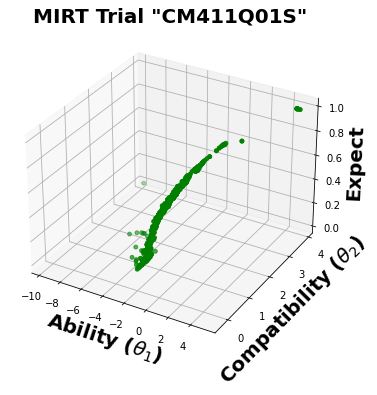

In [75]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


xs = extract_th1.copy()
ys = extract_th2.copy()
zs = rat_z.copy()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='g', marker='o', s=15, cmap='Greens')

ax.set_title('MIRT Trial "CM411Q01S"', fontdict={'weight': 'bold', 'size': 20})
ax.set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_ylabel('Compatibility ('r'$\theta_2$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_zlabel('Expect', fontdict={'weight': 'bold', 'size': 20})

plt.show()

## To Plot in 2D

In [134]:
# Ingredient Preprocessing
seed_z = expect_model(alpha1_test, alpha2_test, d_test, theta1_test, theta2_test)
vect_z = seed_z.copy()                     # expectation value

vect_th1 = theta1_test[:, 0].copy()        # Ability vector
#vect_th2 = theta2_test[:, 0].copy()       # Compatibility vector

vect_real = num_df.copy()                  # real value of correct or incorrect

In [131]:
print(columcolum)
print(columcolum.shape[0])
#print(cols_list)


Index(['CM033Q01S', 'CM474Q01S', 'CM155Q01S', 'CM155Q04S', 'CM411Q01S',
       'CM411Q02S', 'CM803Q01S', 'CM442Q02S', 'CM034Q01S', 'CM305Q01S',
       'CM496Q01S', 'CM496Q02S', 'CM423Q01S', 'CM192Q01S', 'CM603Q01S',
       'CM571Q01S', 'CM564Q01S', 'CM564Q02S', 'CM447Q01S', 'CM273Q01S',
       'CM408Q01S', 'CM420Q01S', 'CM446Q01S', 'CM559Q01S', 'CM828Q03S',
       'CM464Q01S', 'CM800Q01S', 'CM982Q01S', 'CM982Q02S', 'CM982Q03S',
       'CM982Q04S', 'CM992Q01S', 'CM992Q02S', 'CM915Q01S', 'CM915Q02S',
       'CM906Q01S', 'CM909Q01S', 'CM909Q02S', 'CM909Q03S', 'CM949Q01S',
       'CM949Q02S', 'CM00GQ01S', 'CM998Q04S', 'CM905Q01S', 'CM919Q01S',
       'CM919Q02S', 'CM954Q01S', 'CM954Q04S', 'CM943Q01S', 'CM943Q02S',
       'CM953Q03S'],
      dtype='object')
51


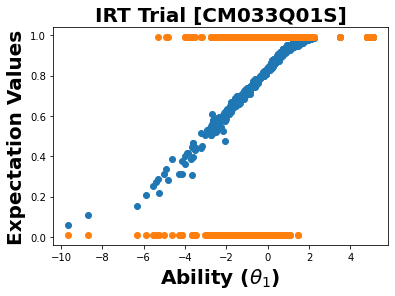

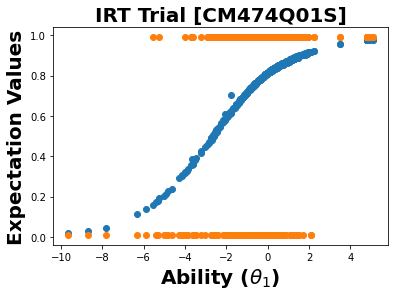

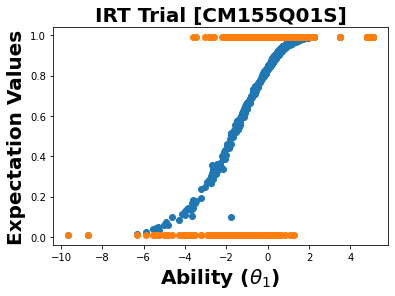

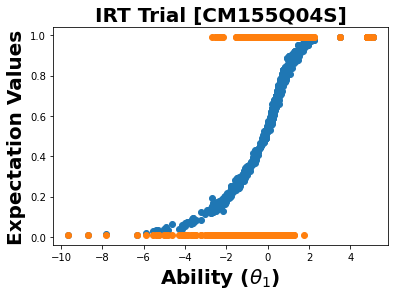

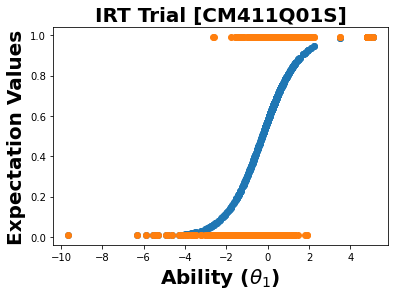

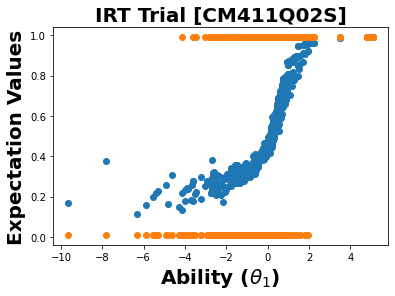

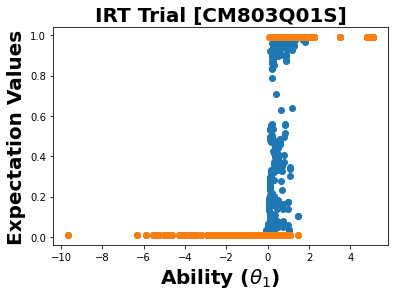

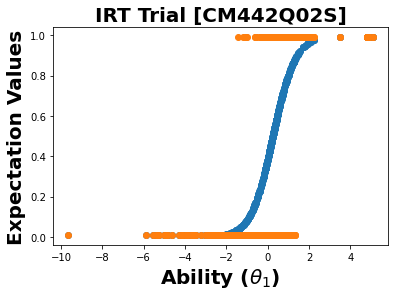

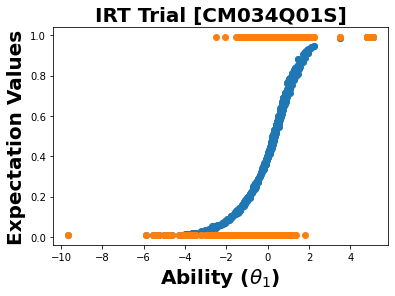

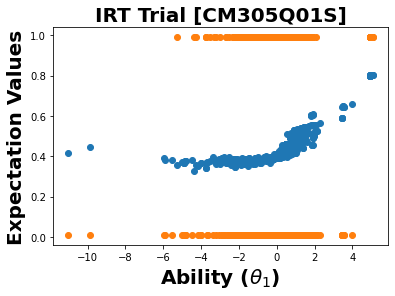

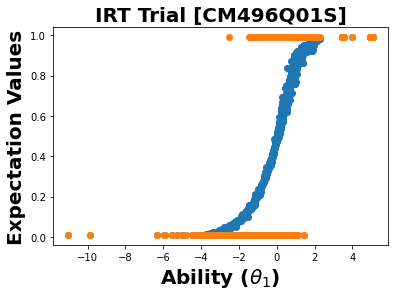

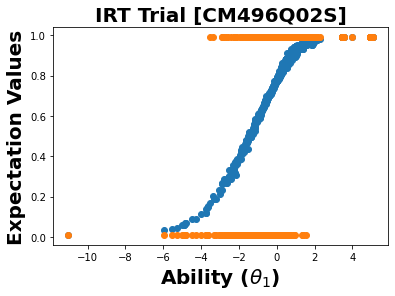

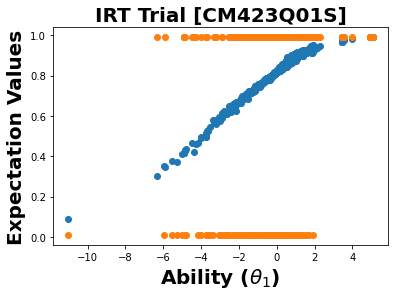

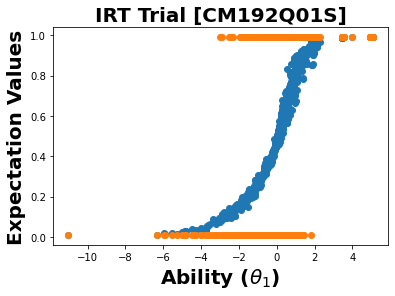

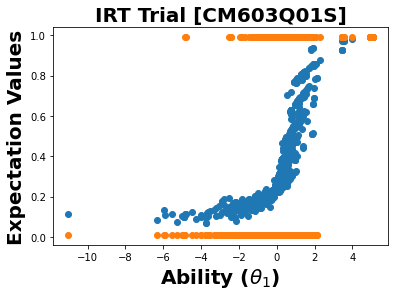

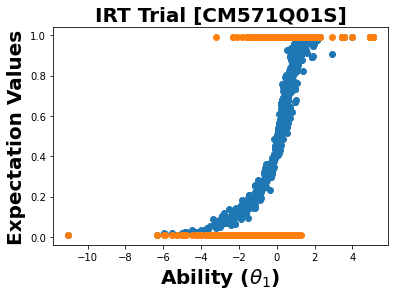

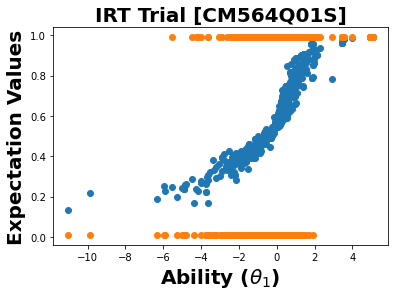

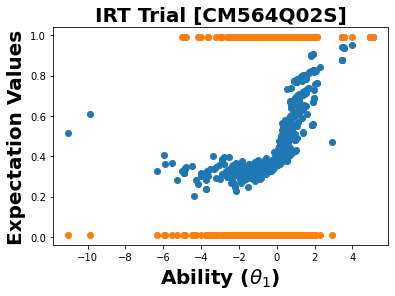

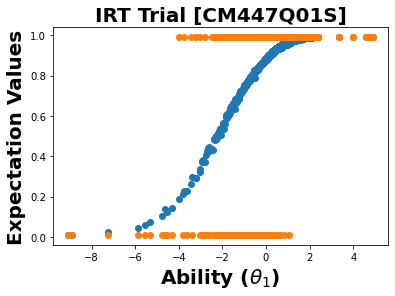

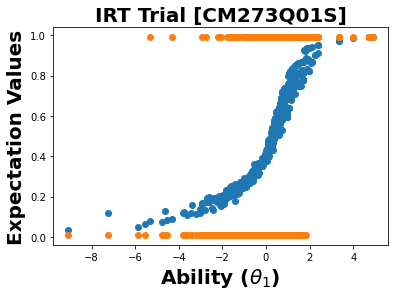

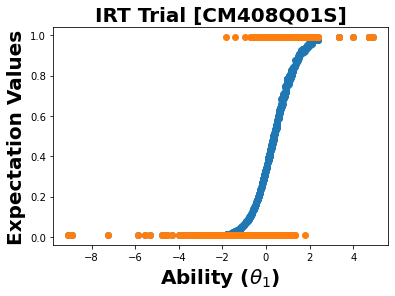

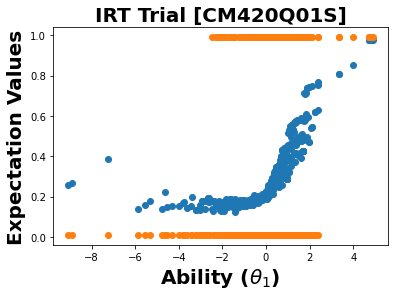

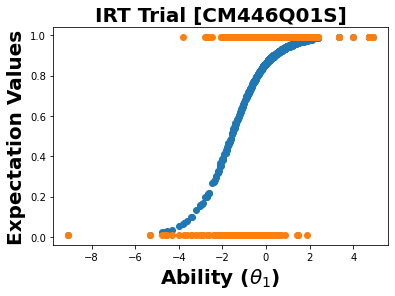

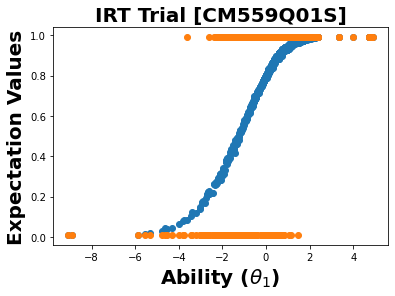

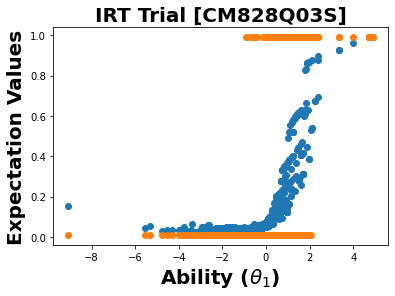

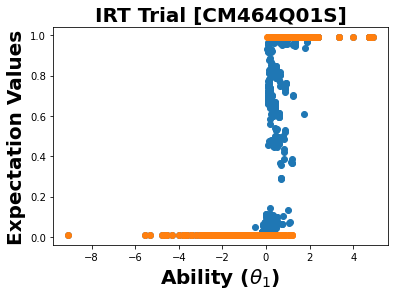

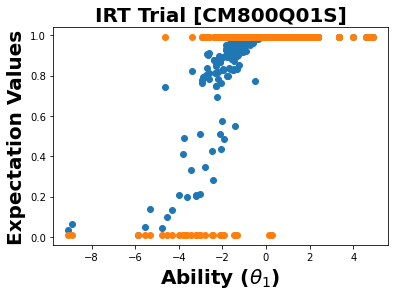

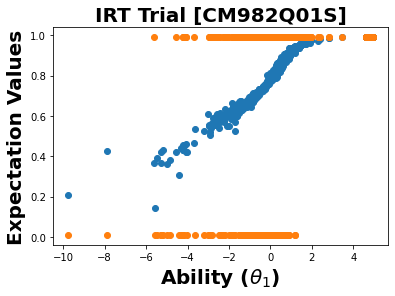

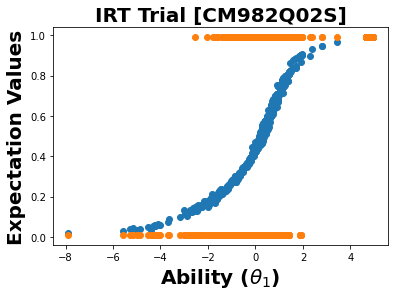

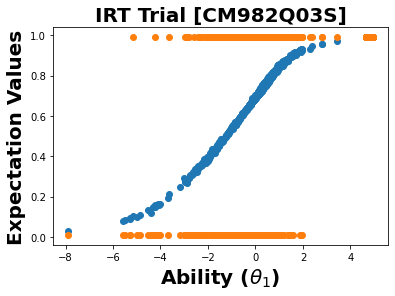

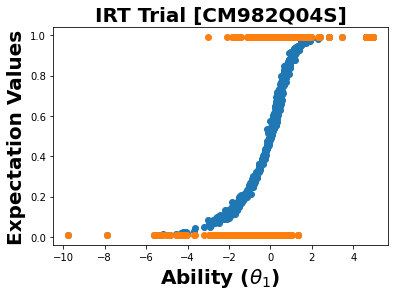

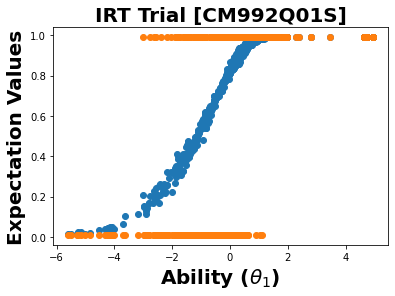

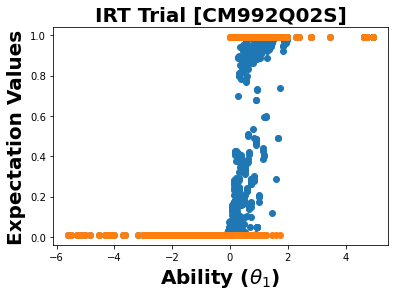

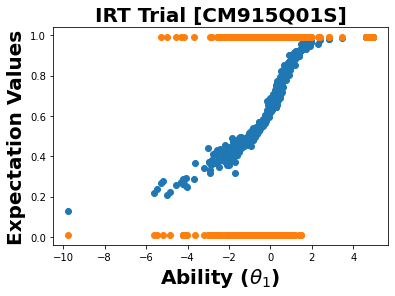

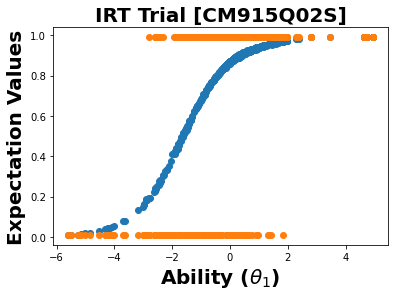

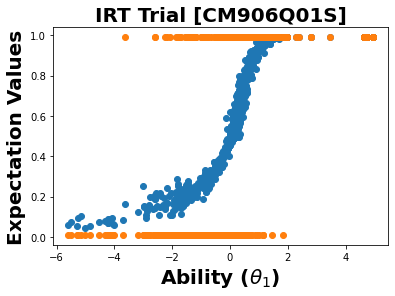

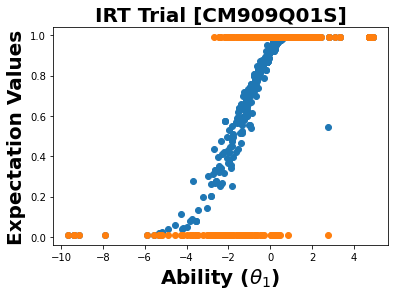

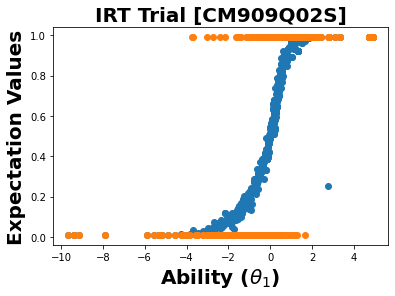

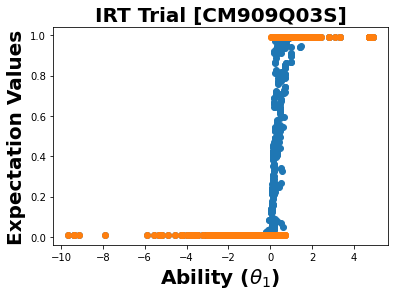

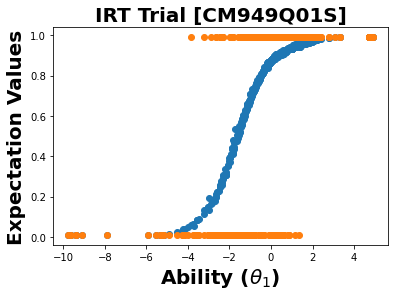

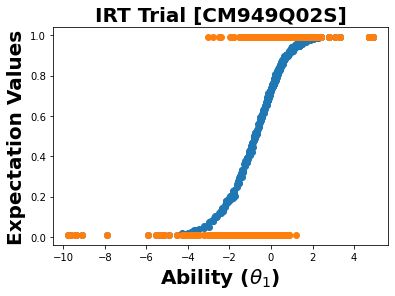

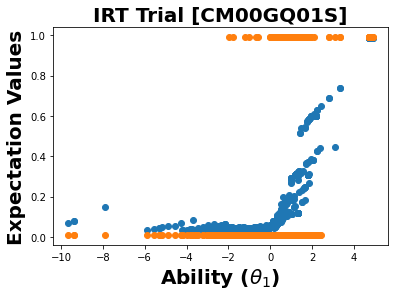

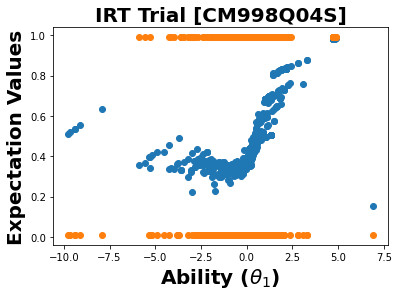

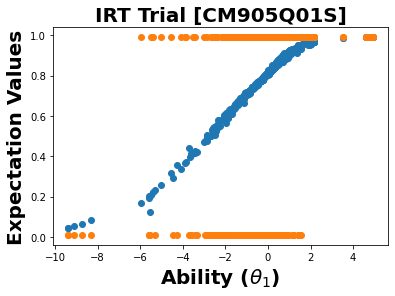

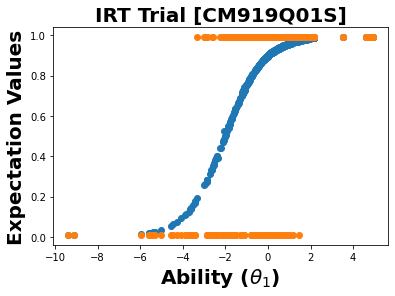

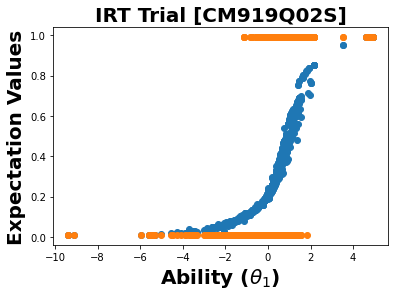

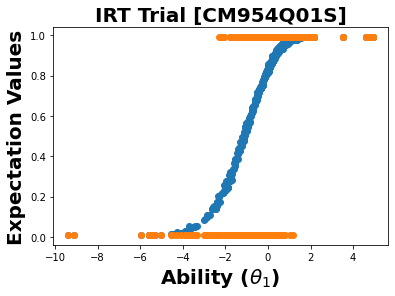

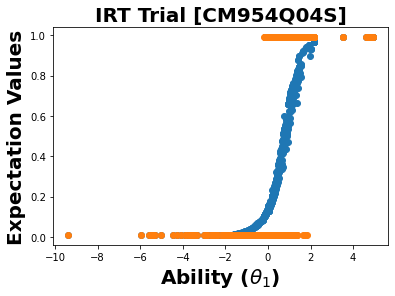

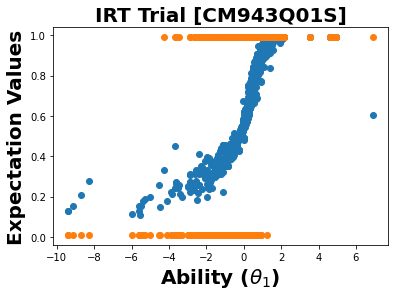

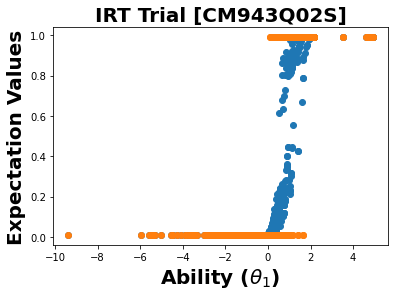

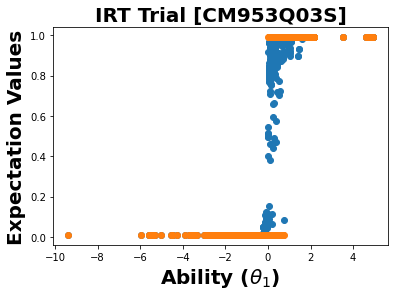

In [146]:
for i in range(seed_z.shape[1]):
    copy_th1 = vect_th1.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th1 = np.delete(copy_th1, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = copy_th1.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    plt.scatter(x=xs, y=ys)
    plt.scatter(x=xs, y=zs)

    plt.title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 20})
    plt.xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
    plt.ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 20})
    plt.show()
            

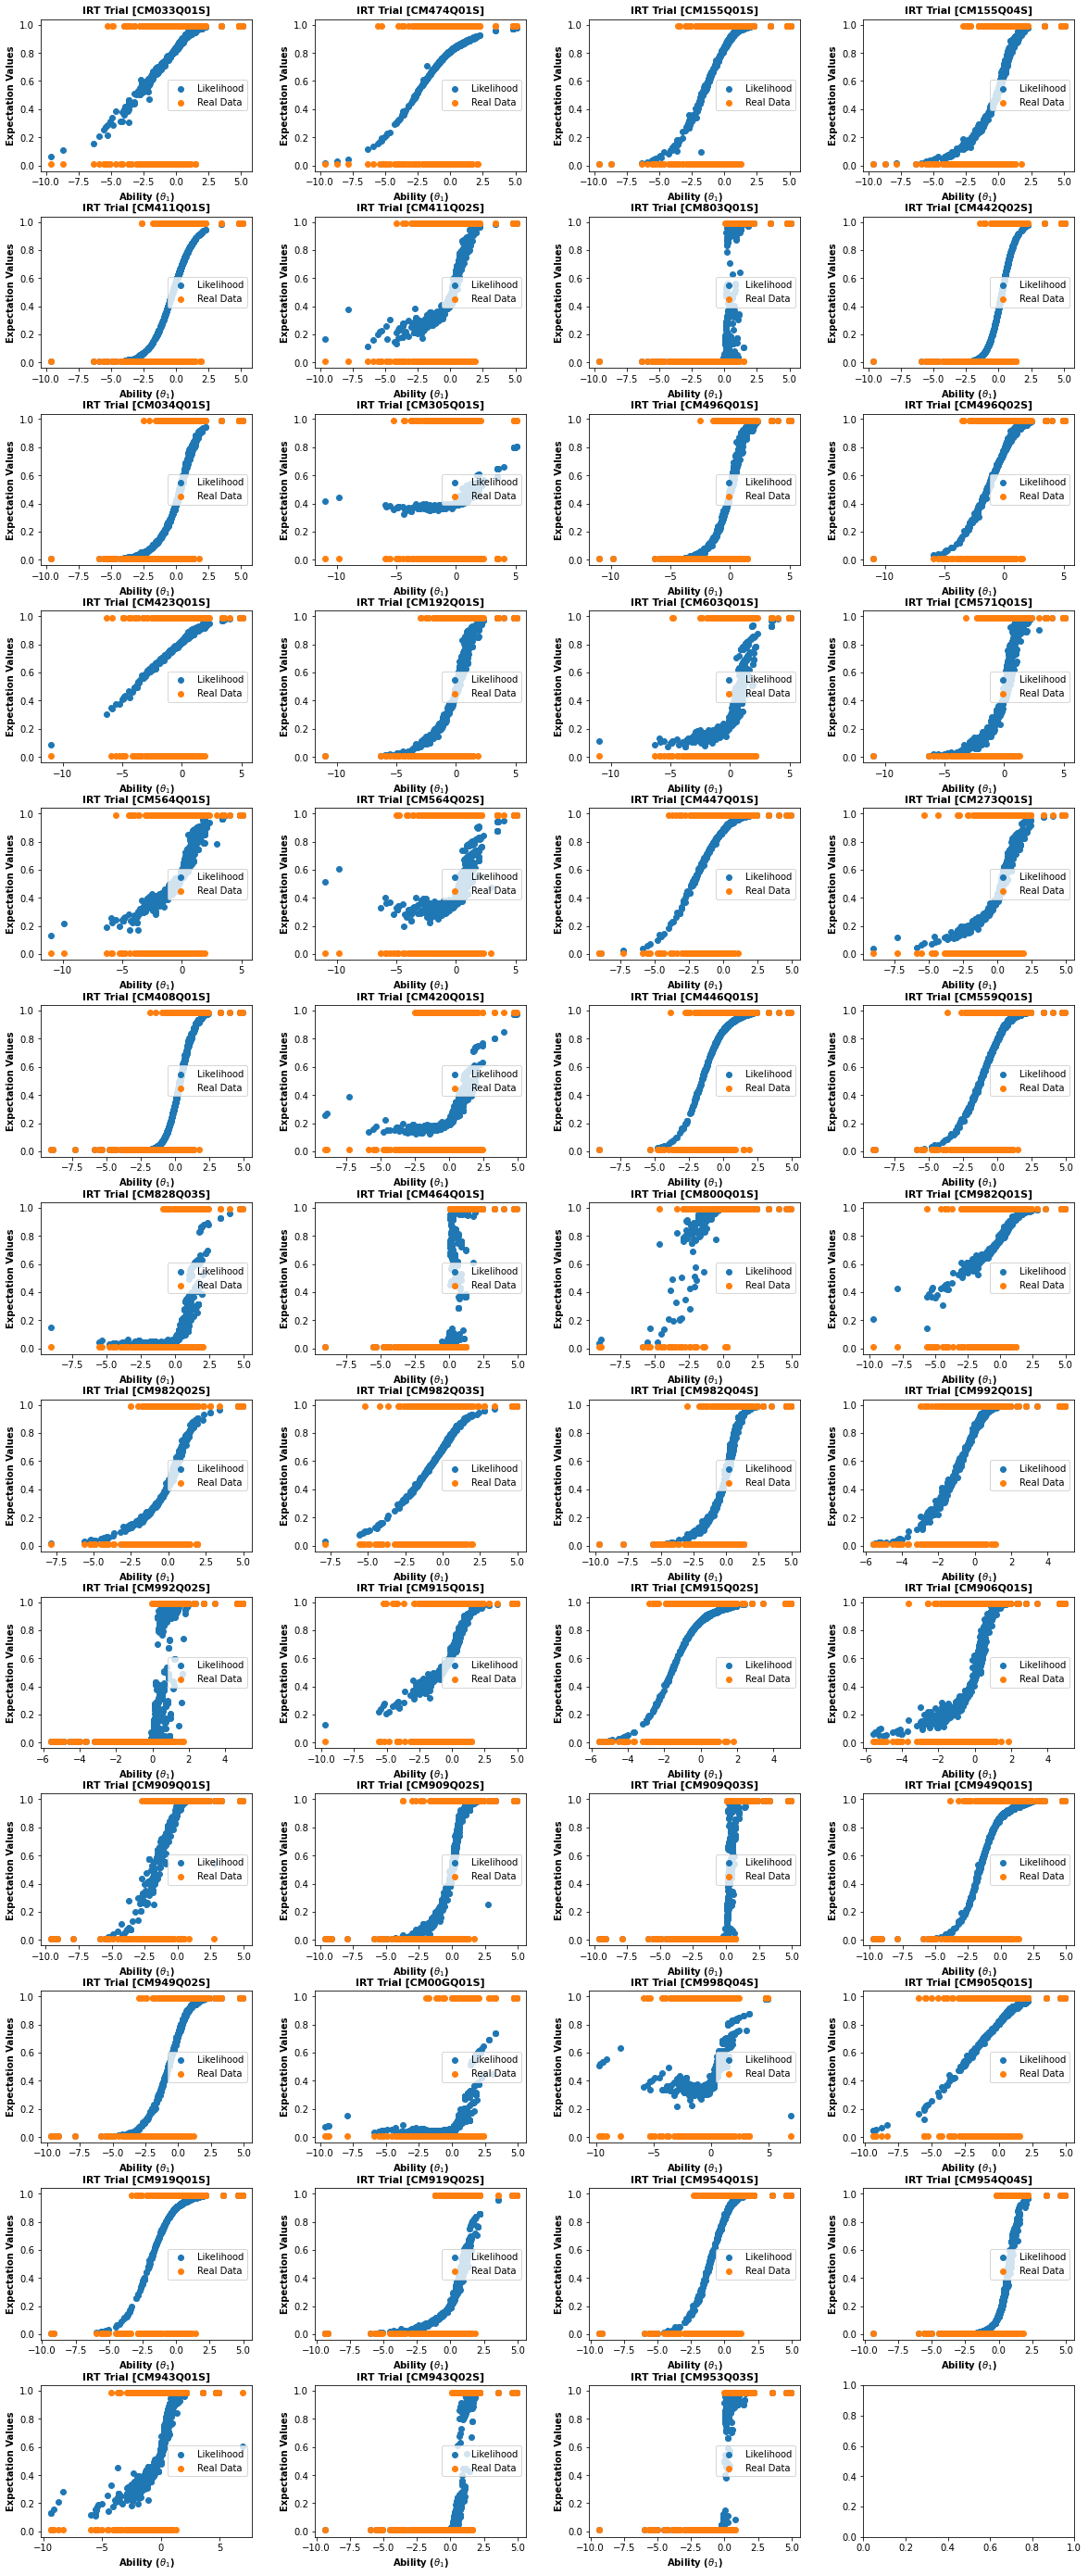

In [148]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    copy_th1 = vect_th1.copy()              # 다음 문제에 활용하기 위해 리셋
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            copy_th1 = np.delete(copy_th1, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = copy_th1.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

## Plot in 'Equivalent Ability'

Equilvalent Ability is introduced to confirm the tendency of changing the model by the conversion formula below.

$\theta_{eq} = \theta_1 + \frac{\alpha_2}{\alpha_1} \theta_2$ 

In this formula, the compatibility($\theta_2$) plays the role to revise the initial bias of the ability($\theta_1$).

In [154]:
print(alpha1_test.shape)
print(theta2_test.shape)
print(alpha1_test[0, :])
print(alpha1_test[0, :][50])

(1, 51)
(2727, 1)
[ 0.67123773  0.53142967  1.05464211  0.93770522  1.15688907  0.60766841
 24.0166354   1.92686918  1.10396416  0.10872423  1.32513274  0.94096696
  0.45059849  0.97342507  0.5703266   1.18965978  0.52915608  0.32875964
  0.98146889  0.69757717  2.0384889   0.34189099  1.12179672  1.13570208
  0.62427013 24.37038612  3.65593097  0.55439346  0.74885273  0.66502854
  1.18796121  1.44757222 13.51556317  0.60430406  1.11131175  1.09103622
  1.9587829   1.62502271 21.46070669  1.11219329  1.32474997  0.47488196
  0.27801937  0.62287967  1.05055029  0.85526618  1.51280405  1.77674117
  0.90221506  9.39046776 22.79747325]
22.79747325467477


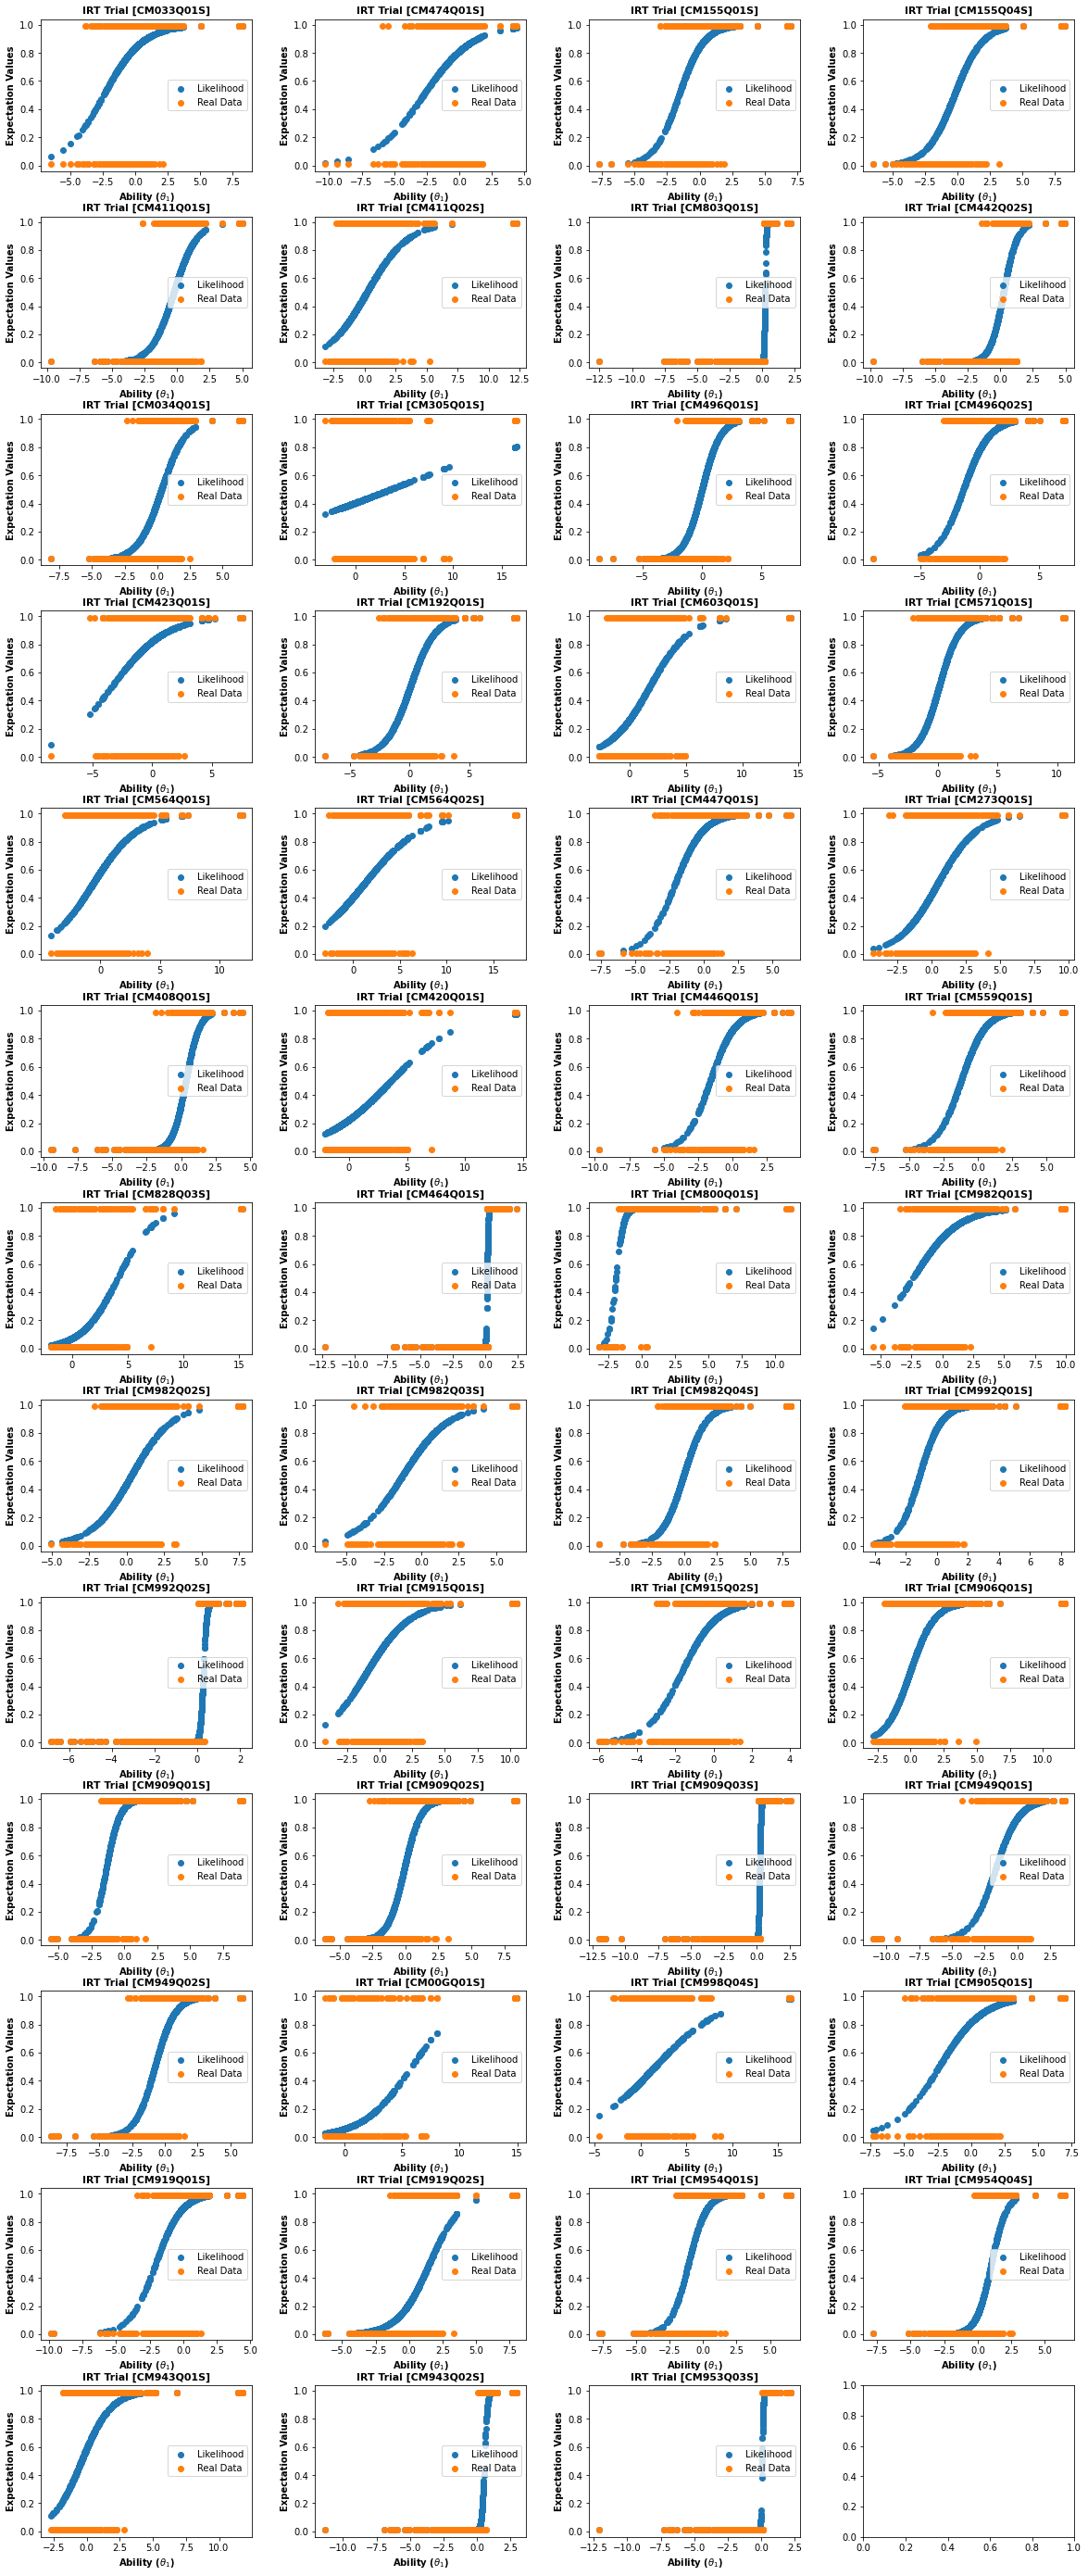

In [156]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

copy_th1 = vect_th1.copy()
copy_th2 = theta2_test[:, 0].copy()
copy_al1 = alpha1_test[0, :].copy()
copy_al2 = alpha2_test[0, :].copy()

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    th_eq = copy_th1 + ((copy_al2[i]) / (copy_al1[i])) * copy_th2
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            th_eq = np.delete(th_eq, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = th_eq.tolist()    # Theta Column
    #print(xs)
    ys = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    zs = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

plt.show()

## The Plot in 3D Again

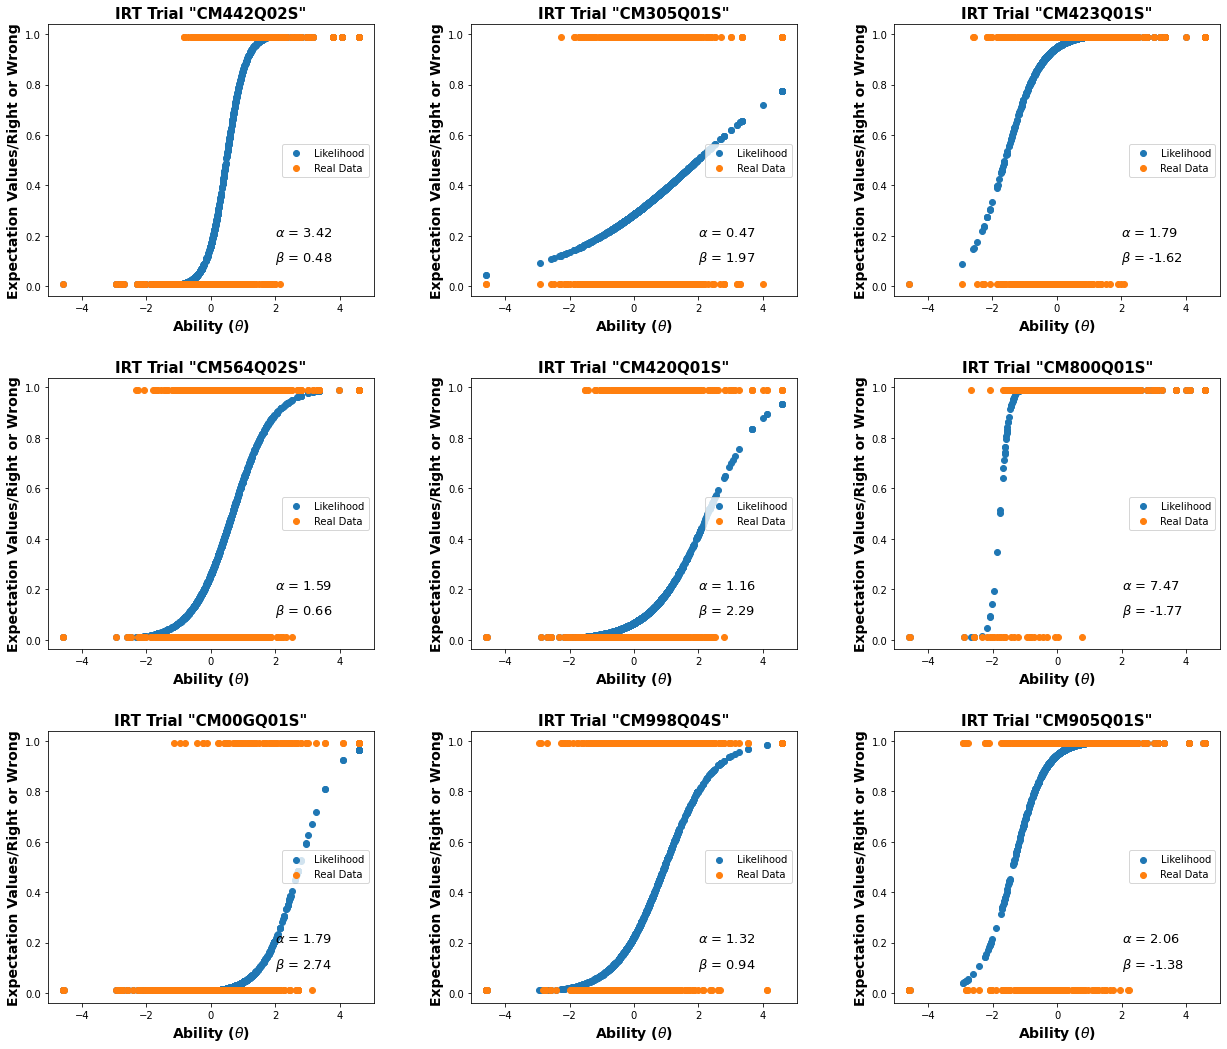

In [43]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0

copy_th1 = vect_th1.copy()
copy_th2 = theta2_test[:, 0].copy()
copy_al1 = alpha1_test[0, :].copy()
copy_al2 = alpha2_test[0, :].copy()

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for i in range(seed_z.shape[1]):
    cat_th1 = copy_th1.copy()
    cat_th2 = copy_th2.copy()
    copy_z = vect_z[:, i].copy()                  # 다음 문제에 활용하기 위해 리셋
    copy_real = vect_real[:, i].copy()            # 다음 문제에 활용하기 위해 리셋
    
    for j in range(seed_z[:, i].shape[0]):
        
        n = seed_z[:, i].shape[0] - (j + 1)
        
        if np.isnan(seed_z[:, i][n]):
            th_eq = np.delete(th_eq, n)
            copy_z = np.delete(copy_z, n)
            copy_real = np.delete(copy_real, n)
            
    xs = cat_th1.tolist()    # Theta Column
    ys = cat_th2.tolist()
    #print(xs)
    z1 = copy_z.tolist()    # CM411Q02S Column
    #print(ys)
    z2 = copy_real.tolist()   # CM411Q02S Real df Column

    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')

    axes[garo, sero].set_title('IRT Trial [{0}]'.format(columcolum[i]), fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values', fontdict={'weight': 'bold', 'size': 10})
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4

xs = extract_th1.copy()
ys = extract_th2.copy()
zs = rat_z.copy()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, color='g', marker='o', s=15, cmap='Greens')

ax.set_title('MIRT Trial "CM411Q01S"', fontdict={'weight': 'bold', 'size': 20})
ax.set_xlabel('Ability ('r'$\theta_1$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_ylabel('Compatibility ('r'$\theta_2$'')', fontdict={'weight': 'bold', 'size': 20})
ax.set_zlabel('Expect', fontdict={'weight': 'bold', 'size': 20})
    
plt.show()

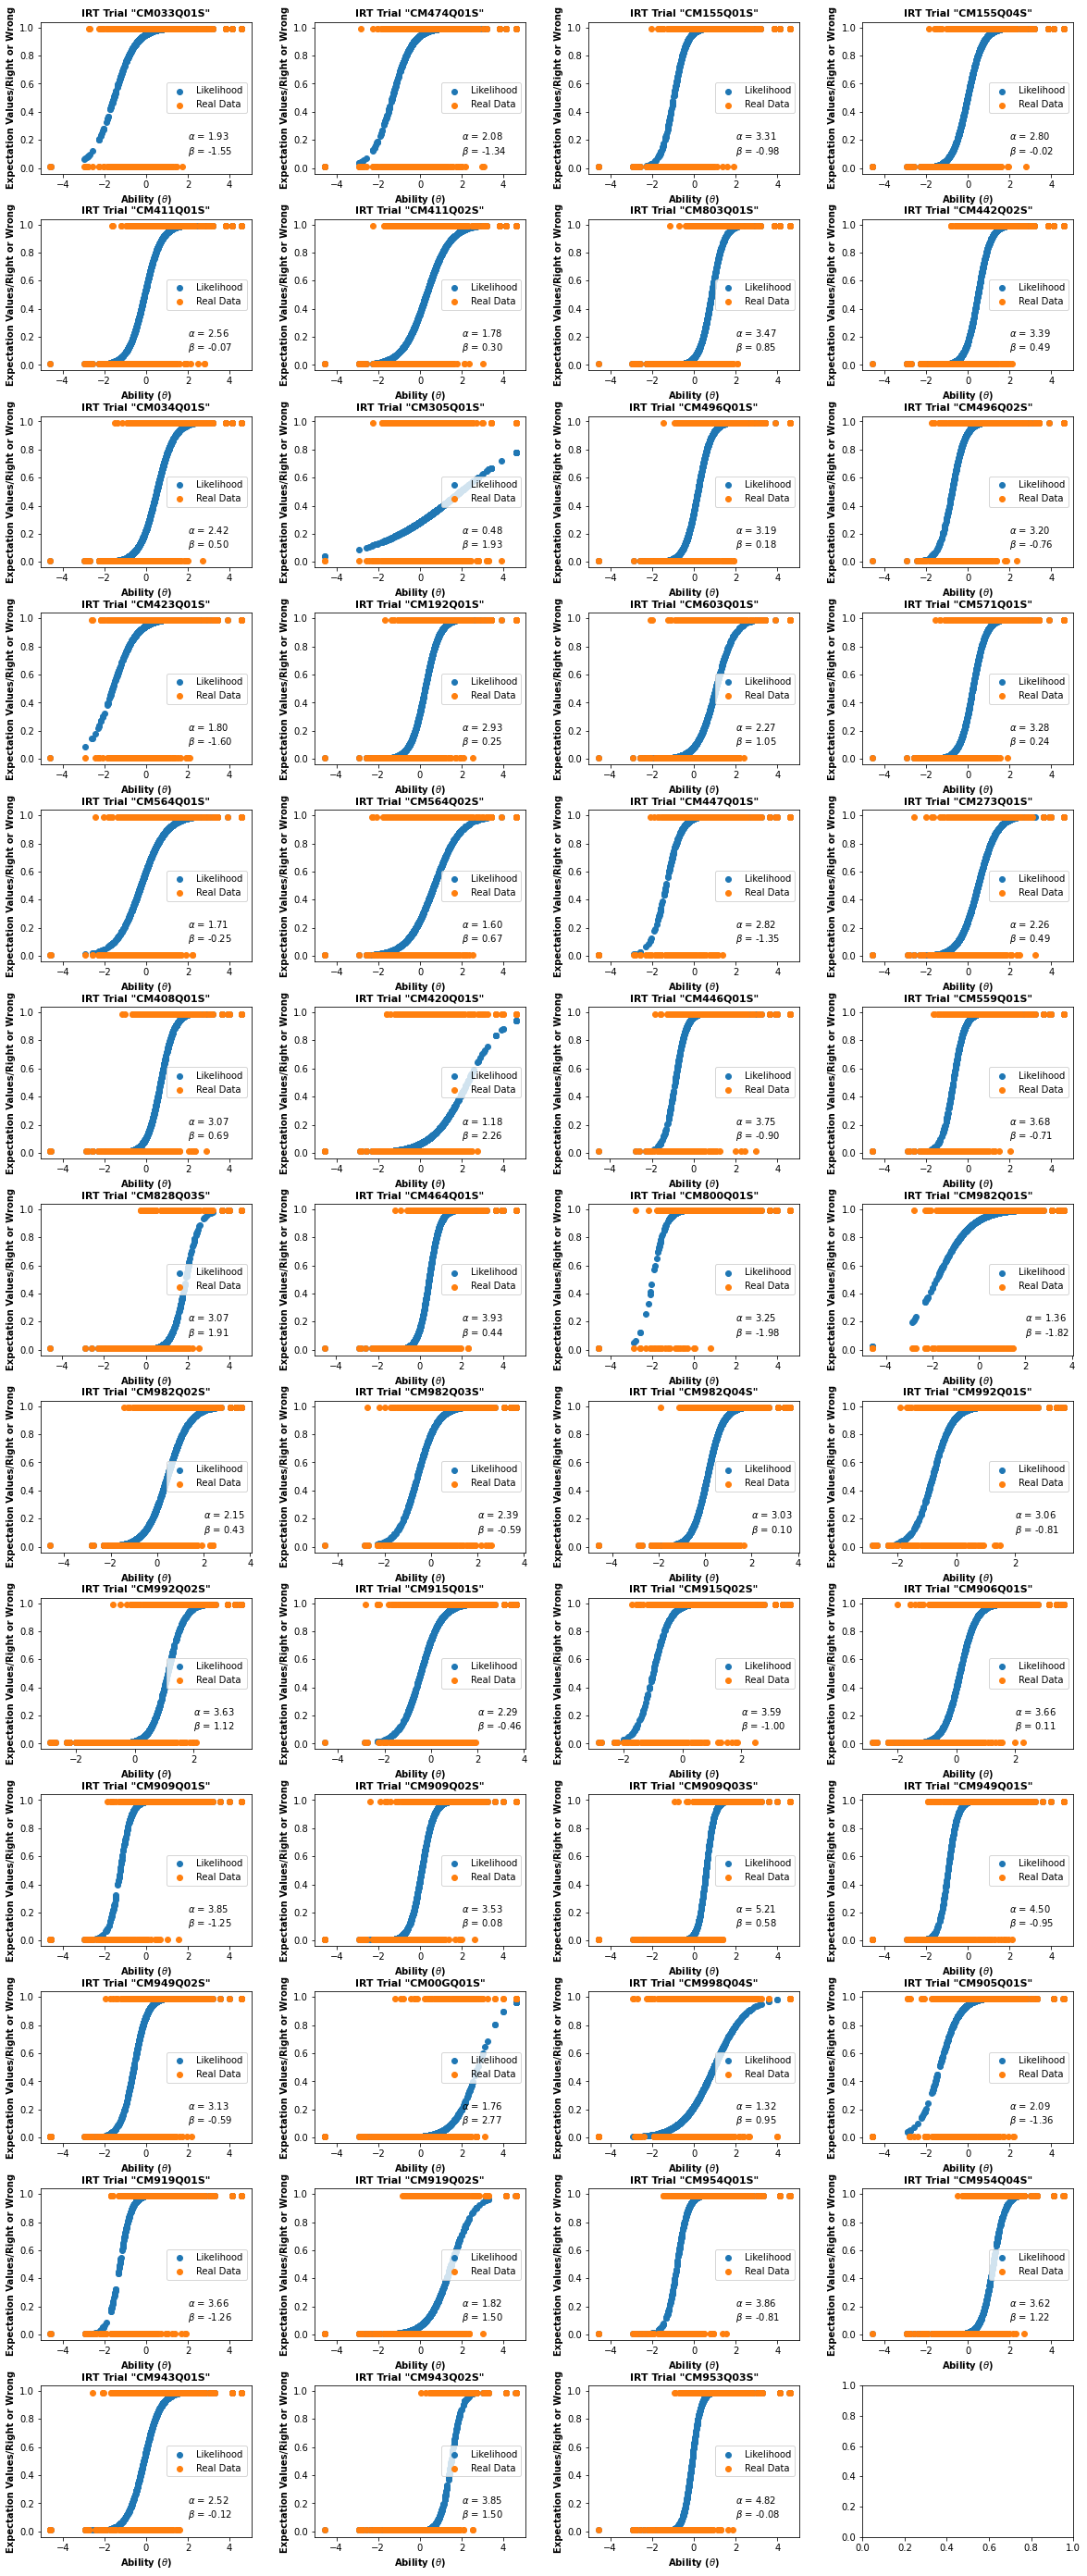

In [138]:
# 최종 plotting 결과를 격자 방식으로 나열
f, axes = plt.subplots(13, 4)
garo = 0
sero = 0
rank = 0

# 격자 크기 설정
f.set_size_inches((20, 50))

# 격자 여백 설정
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

# 놀고먹는 xs

# 격자 채워넣기

#start_16bit = columcolum.shape[0] // 16

#while start_16bit >= 0:
    
for n in range(columcolum.shape[0]):
    Tough_fin = DataSet[[0, n+1, n+52]]
    rough_fin = Tough_fin.dropna(axis=0)
    
    xs = rough_fin[0].tolist()
    ys = rough_fin[n+1].tolist()
    zs = rough_fin[n+52].tolist()
    axes[garo, sero].scatter(x=xs, y=ys, label='Likelihood')
    axes[garo, sero].scatter(x=xs, y=zs, label='Real Data')
    
    axes[garo, sero].set_title('IRT Trial "%s"' %columcolum[n], fontdict={'weight': 'bold', 'size': 11})
    axes[garo, sero].set_xlabel('Ability ('r'$\theta$'')', fontdict={'weight': 'bold', 'size': 10})
    axes[garo, sero].set_ylabel('Expectation Values/Right or Wrong', fontdict={'weight': 'bold', 'size': 10})
        
    axes[garo, sero].text(2, 0.2, r'$\alpha$ = {0:0.2f}'.format(alpha_2[0][rank]), size = 10)
    axes[garo, sero].text(2, 0.1, r'$\beta$ = {0:0.2f}'.format(beta_2[0][rank]), size = 10)
    
    axes[garo, sero].legend(loc='right')
    
    sero += 1
    garo += sero // 4
    sero = sero % 4
    rank += 1


plt.show()

## Comparison with existing theta

In [90]:
theta_ex = pd.read_csv("theta_LLH_T.csv")
print(theta_ex)

   Unnamed: 0         0        1         2         3         4         5  \
0           0  1.338115  0.78464  0.651824  0.189492  1.116489  0.013114   

          6         7         8  ...      2717      2718      2719      2720  \
0  2.214264 -1.300957  4.733336  ...  0.636779  1.282822  0.397753  0.442488   

       2721      2722      2723      2724      2725      2726  
0  0.500753  0.666618 -0.906567  1.266233 -1.178359  0.173322  

[1 rows x 2728 columns]


In [92]:
theta_pr1 = theta_ex.to_numpy()
theta_pr2 = theta_pr1[0, 1:]
print(theta_pr2)
print(theta_pr2.shape)

[ 1.33811548  0.78464012  0.65182431 ...  1.26623277 -1.17835892
  0.17332202]
(2727,)


In [93]:
# Now, it is time to compare two thetas in the end!!

import matplotlib.pylab as pylab
from sklearn.metrics import r2_score

In [95]:
theta_now = theta1_test.copy()
theta_nowT = np.transpose(theta_now)
theta_now_fin = theta_nowT[0, :]
print(theta_now_fin)
print(theta_now_fin.shape)

[ 0.72971997  0.39122746  0.17567364 ...  0.73272057 -1.97804416
  0.23704775]
(2727,)


In [96]:
x = theta_pr2
y = theta_now_fin
R2 = r2_score(x, y)
print(R2)

0.6966027534600208


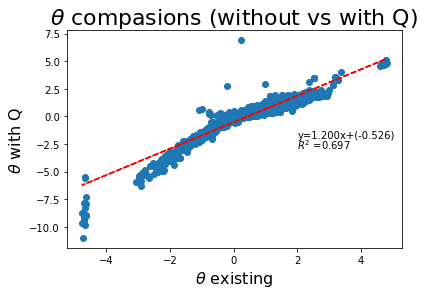

In [98]:
z = np.polyfit(x, y, 1) # (X,Y,차원) 정의
p = np.poly1d(z) # 1차원 다항식에 대한 연산을 캡슐화

pylab.plot(x, y,'o')
pylab.plot(x,p(x),"r--")
pylab.xlabel(r'$\theta$' " existing", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " with Q", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (without vs with Q)", fontdict={'size': 22})
pylab.text(2,-2, "y=%.3fx+(%.3f)"%(z[0],z[1]), fontdict={'size': 10})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})
pylab.show()

## Comparison with two thetas (Ability vs Compatibility)

In [99]:
theta_comp = theta2_test.copy()
theta_compT = np.transpose(theta_comp)
theta_comp_fin = theta_compT[0, :]
print(theta_comp_fin)
print(theta_comp_fin.shape)

[ 0.69954619  0.16042618  0.05651492 ...  0.77047953  0.24571932
 -0.11312024]
(2727,)


In [100]:
x_2 = theta_now_fin               # Ability
y_2 = theta_comp_fin              # Compatibility
R2 = r2_score(x_2, y_2)
print(R2)

z_2 = np.polyfit(x_2, y_2, 1) # (X,Y,차원) 정의
p_2 = np.poly1d(z_2) # 1차원 다항식에 대한 연산을 캡슐화

-0.09758651870471513


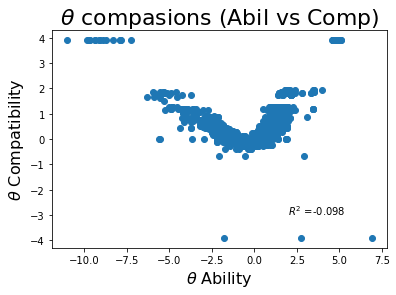

In [103]:
pylab.plot(x_2, y_2,'o')
pylab.xlabel(r'$\theta$' " Ability", fontdict={'size': 16})
pylab.ylabel(r'$\theta$' " Compatibility", fontdict={'size': 16})
pylab.title(r'$\theta$' " compasions (Abil vs Comp)", fontdict={'size': 22})
pylab.text(2,-3, r'$R^2$'" =%.3f"% R2, fontdict={'size': 10})
pylab.show()